# <center> $ Lung Cancer Level Prediction $ <center>

#### $Dataset$ $Description$
#### $Dataset$

This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails,frequent cold, dry cough and snoring

#### $Columns$


- Age: The age of the patient. (Numeric)
- Gender: The gender of the patient. (Categorical)
- Air Pollution: The level of air pollution exposure of the patient. (Categorical)
- Alcohol use: The level of alcohol use of the patient. (Categorical)
- Dust Allergy: The level of dust allergy of the patient. (Categorical)
- OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
- Genetic Risk: The level of genetic risk of the patient. (Categorical)
- chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
- Balanced Diet: The level of balanced diet of the patient. (Categorical)
- Obesity: The level of obesity of the patient. (Categorical)
- Smoking: The level of smoking of the patient. (Categorical)
- Passive Smoker: The level of passive smoker of the patient. (Categorical)
- Chest Pain: The level of chest pain of the patient. (Categorical)
- Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
- Fatigue: The level of fatigue of the patient. (Categorical)
- Weight Loss: The level of weight loss of the patient. (Categorical)
- Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
- Wheezing: The level of wheezing of the patient. (Categorical)
- Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
- Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)
- Frequent Cold: The level of getting frequent cold of the patient. (Categorical)
- Dry Cough: The level of getting dry cough of the patient. (Categorical)
- Snoring: The level of snoring of a patient. (Categorical)

#### $Target$

- Level : Intensity of the cancer (Low,Medium or High)

## $ Importing$ $Libraries $

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from scipy import stats
from scipy.stats import norm
from sklearn.tree import plot_tree

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

## $Load$ $Data$

In [2]:
df_cancer=pd.read_csv("cancer_patient_data_set4.csv")
df_cancer

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              6            7             7   
1        1        P10   17       1              1            3             2   
2        2       P100   35       1              6            8             7   
3        3      P1000   37       1              4            5             6   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              4            5             6   
996    996       P996   37       2              2            4             5   
997    997       P997   25       2              3            1             4   
998    998       P998   18       2              4            5             6   
999    999       P999   47       1              2            3             4   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       7             7                     6  ...        4   
1                       4             2                     6  ...        4   
2                       7             6                     7  ...        5   
3                       5             5                     4  ...        8   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     5             5                     4  ...        8   
996                     4             3                     2  ...        3   
997                     3             2                     3  ...        3   
998                     5             6                     5  ...        1   
999                     2             4                     3  ...        1   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    5         6                      5   
1              2                    2         2                      3   
2              2                    5         2                      3   
3              7                    9         2                      1   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            7                    9         2                      1   
996            4                    2         2                      3   
997            2                    2         4                      2   
998            4                    3         2                      4   
999            2                    4         6                      5   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           5              4          6        4     Low  
1                           2              1          2        2  Medium  
2                           2              1          7        2    High  
3                           4              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         4              6          7        3    High  
996                         1              2          3        4    High  
997                         2              3          4        2    High  
998                         6              2          4        3    High  
999                         4              2          1        2    High  

[1000 rows x 26 columns]

In [3]:
df_cancer.duplicated().sum()

0

## $Data$  $Description$

In [4]:
print('size =',df_cancer.size)
print('(row,column) =',df_cancer.shape)

size = 26000
(row,column) = (1000, 26)


In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df_cancer.describe()

index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    499.500000    37.174000     1.401000       3.833000     4.583000   
std     288.819436    12.005493     0.490346       2.028109     2.598435   
min       0.000000    14.000000     1.000000       1.000000     1.000000   
25%     249.750000    27.750000     1.000000       2.000000     2.000000   
50%     499.500000    36.000000     1.000000       3.000000     5.000000   
75%     749.250000    45.000000     2.000000       6.000000     7.000000   
max     999.000000    73.000000     2.000000       8.000000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.207000              4.833000      4.590000              4.368000   
std        1.936466              2.096069      2.106736              1.843902   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      3.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.520000  ...           4.877000     3.852000     3.878000   
std         2.115201  ...           2.410328     2.201577     2.177581   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         5.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.290000     3.782000               3.746000   
std               2.267828     2.030418               2.241988   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.555000     3.926000     2.926000  
std                    2.373332       1.840207     2.031909     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

In [7]:
# Value Counts of the columns in the dataset

for column in df_cancer.columns:
    print(df_cancer[column].value_counts())
    print('\n')

0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: index, Length: 1000, dtype: int64


P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient Id, Length: 1000, dtype: int64


35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: Age, dtype: int64


1    599
2    401
Name: Gender, dtype: int64


6    315
2    203
3    175
1    138
4     98
7     29
8     23
5     19
Name: Air Pollution, dtype: int64


2    190
8    186
7    164
1    151
5     98
3     84
6     83
4     44
Name: Alcohol use, dtype: int64


7    401
4    147
6    118
5    114
3     89
2     66
1

## $ Data$ $Preprocessing $

In [8]:
# Checking for Null values

df_cancer.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

- There is no missing data found in the dataset

- Seems like index and Patient Id are unique for every row and will thus deviate the accuracy of our model. So lets remove them

In [9]:
# Removing the columns 'Patient Id' and 'Index'
df_cancer.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
df_cancer

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              6            7             7   
1     17       1              1            3             2   
2     35       1              6            8             7   
3     37       1              4            5             6   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              4            5             6   
996   37       2              2            4             5   
997   25       2              3            1             4   
998   18       2              4            5             6   
999   47       1              2            3             4   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       7             7                     6              7   
1                       4             2                     6              2   
2                       7             6                     7              7   
3                       5             5                     4              6   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     5             5                     4              6   
996                     4             3                     2              2   
997                     3             2                     3              4   
998                     5             6                     5              5   
999                     2             4                     3              3   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          7  ...        4            4                    5         6   
1          2  ...        4            2                    2         2   
2          3  ...        5            2                    5         2   
3          7  ...        8            7                    9         2   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        8            7                    9         2   
996        4  ...        3            4                    2         2   
997        3  ...        3            2                    2         4   
998        5  ...        1            4                    3         2   
999        3  ...        1            2                    4         6   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        5                         5              4   
1                        3                         2              1   
2                        3                         2              1   
3                        1                         4              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      1                         4              6   
996                      3                         1              2   
997                      2                         2              3   
998                      4                         6              2   
999                      5                         4              2   

     Dry Cough  Snoring   Level  
0            6        4     Low  
1            2        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          7        3    High  
996          3        4    High  
997          4        2    High  
998          4        3    High  
999          1        2    High  

[1000 rows x 24 columns]

###### Replace "Level" with Integer

In [10]:
df_cancer['Level'].replace(to_replace = 'Low', value = 0, inplace = True)
df_cancer['Level'].replace(to_replace = 'Medium', value = 1, inplace = True)
df_cancer['Level'].replace(to_replace = 'High', value = 2, inplace = True)

df_cancer['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

In [11]:
df_cancer.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              6            7             7   
1   17       1              1            3             2   
2   35       1              6            8             7   
3   37       1              4            5             6   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     7             7                     6              7   
1                     4             2                     6              2   
2                     7             6                     7              7   
3                     5             5                     4              6   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        7  ...        4            4                    5         6   
1        2  ...        4            2                    2         2   
2        3  ...        5            2                    5         2   
3        7  ...        8            7                    9         2   
4        7  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      5                         5              4          6   
1                      3                         2              1          2   
2                      3                         2              1          7   
3                      1                         4              6          7   
4                      4                         2              4          2   

   Snoring  Level  
0        4      0  
1        2      1  
2        2      2  
3        5      2  
4        3      2  

[5 rows x 24 columns]

## $Exploratory$ $Data$ $Analysis$

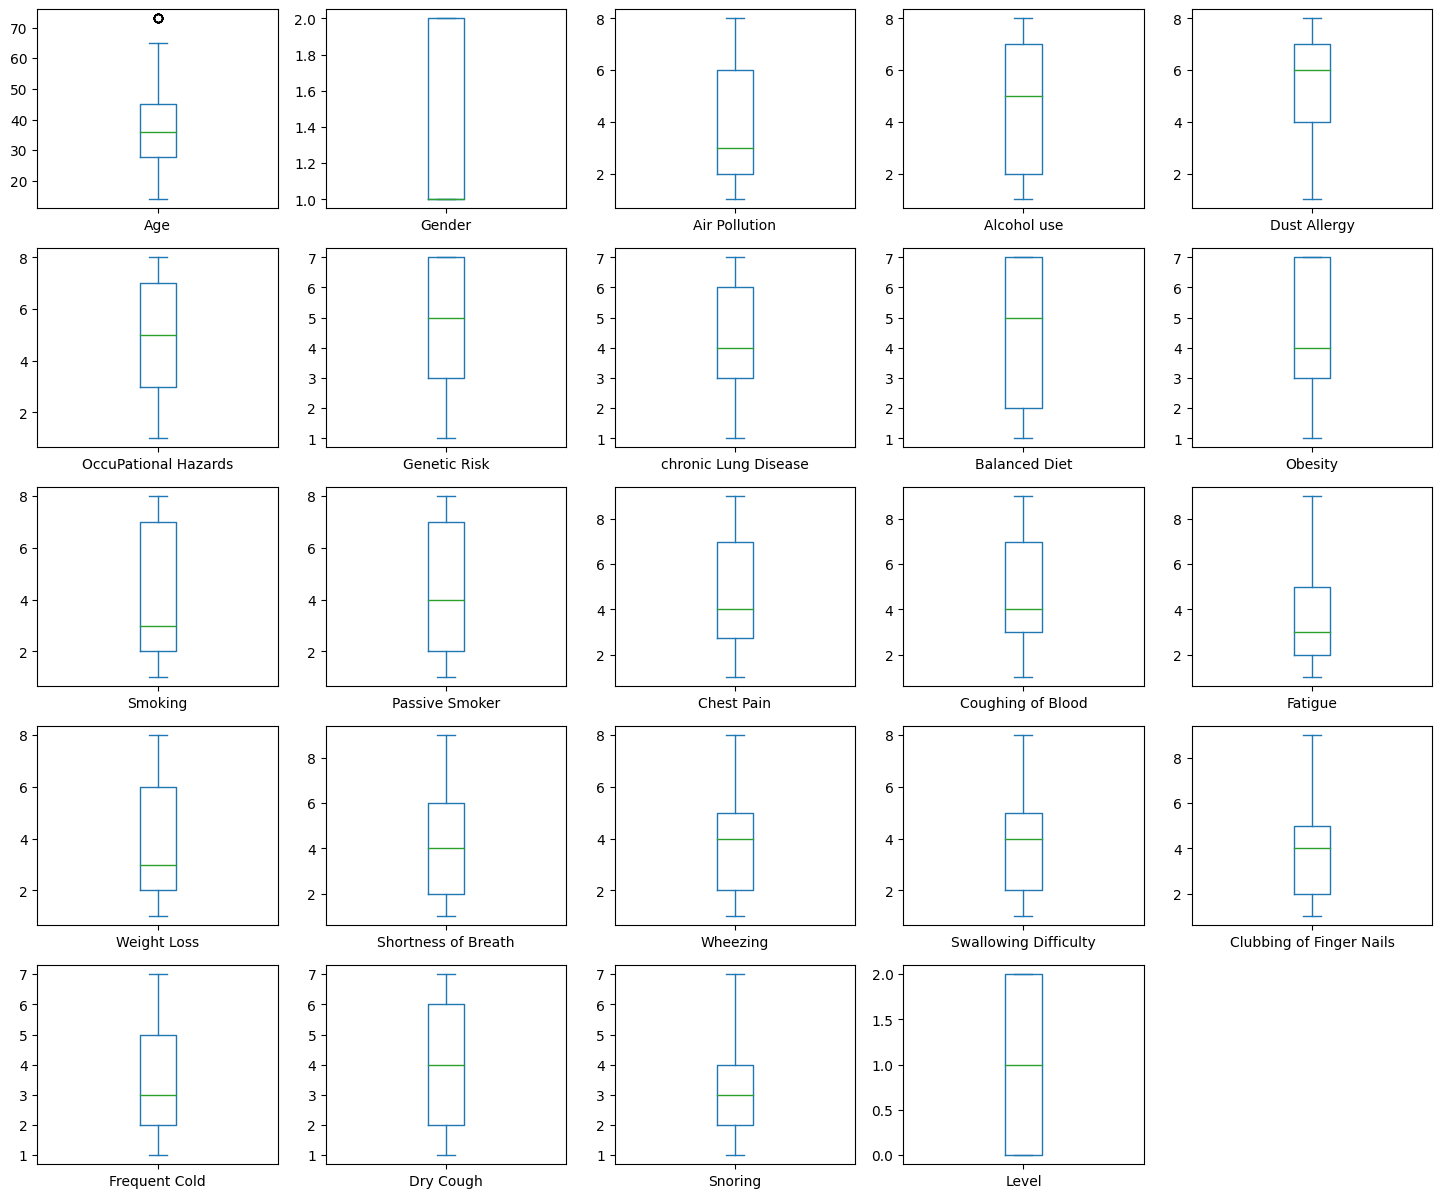

In [12]:
df_cancer.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

<AxesSubplot: title={'center': 'Age Column Box Plot'}>

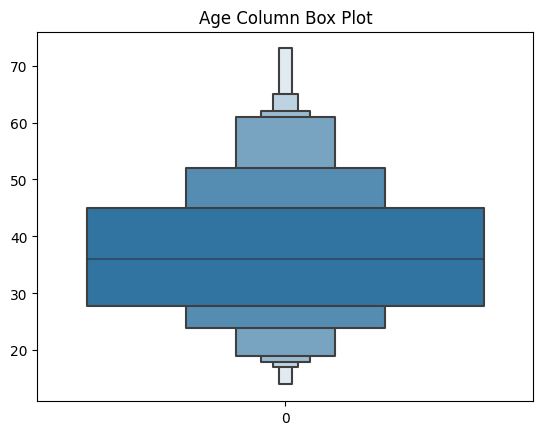

In [13]:
plt.title("Age Column Box Plot")
sns.boxenplot(df_cancer.Age)

- Here we see that our dataset has no outliers

In [14]:
df_cancer.corr()

Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.199079       0.107468     0.150735   
Gender                   -0.199079  1.000000      -0.222483    -0.209594   
Air Pollution             0.107468 -0.222483       1.000000     0.738201   
Alcohol use               0.150735 -0.209594       0.738201     1.000000   
Dust Allergy              0.037244 -0.191871       0.631225     0.808140   
OccuPational Hazards      0.066671 -0.176313       0.609897     0.876000   
Genetic Risk              0.078257 -0.203092       0.702492     0.875344   
chronic Lung Disease      0.129278 -0.179982       0.627013     0.761408   
Balanced Diet             0.014448 -0.077711       0.513780     0.641964   
Obesity                   0.047298 -0.104422       0.594149     0.651840   
Smoking                   0.088106 -0.183570       0.485346     0.550669   
Passive Smoker            0.011462 -0.163051       0.599038     0.579358   
Chest Pain                0.018545 -0.187164       0.579760     0.709032   
Coughing of Blood         0.063629 -0.124227       0.600686     0.659714   
Fatigue                   0.108267 -0.104457       0.190398     0.209151   
Weight Loss               0.099562 -0.059134       0.224759     0.177108   
Shortness of Breath       0.039690 -0.038968       0.245371     0.415486   
Wheezing                 -0.091290 -0.084035       0.012785     0.143075   
Swallowing Difficulty    -0.114351 -0.059318      -0.092773    -0.131605   
Clubbing of Finger Nails  0.031808 -0.034512       0.229412     0.414378   
Frequent Cold            -0.008952  0.011587       0.166475     0.174263   
Dry Cough                 0.012510 -0.112852       0.257637     0.213886   
Snoring                  -0.004700 -0.167952      -0.035262     0.101656   
Level                     0.060048 -0.157387       0.556511     0.651461   

                          Dust Allergy  OccuPational Hazards  Genetic Risk  \
Age                           0.037244              0.066671      0.078257   
Gender                       -0.191871             -0.176313     -0.203092   
Air Pollution                 0.631225              0.609897      0.702492   
Alcohol use                   0.808140              0.876000      0.875344   
Dust Allergy                  1.000000              0.833452      0.778024   
OccuPational Hazards          0.833452              1.000000      0.886450   
Genetic Risk                  0.778024              0.886450      1.000000   
chronic Lung Disease          0.606048              0.852729      0.833832   
Balanced Diet                 0.632065              0.678646      0.668102   
Obesity                       0.683894              0.710189      0.721802   
Smoking                       0.351965              0.497354      0.544959   
Passive Smoker                0.539269              0.546231      0.605077   
Chest Pain                    0.620513              0.765394      0.828226   
Coughing of Blood             0.607453              0.638866      0.631907   
Fatigue                       0.303506              0.244094      0.201644   
Weight Loss                   0.290380              0.145758      0.245904   
Shortness of Breath           0.494844              0.342916      0.438912   
Wheezing                      0.266332              0.134206      0.169570   
Swallowing Difficulty         0.009586             -0.025437     -0.072298   
Clubbing of Finger Nails      0.347384              0.360010      0.362249   
Frequent Cold                 0.211272              0.066354      0.079668   
Dry Cough                     0.299512              0.163027      0.194710   
Snoring                       0.038670              0.010571     -0.062938   
Level                         0.643590              0.605237      0.631348   

                          chronic Lung Disease  Balanced Diet   Obesity  ...  \
Age                                   0.129278       0.014448  0.047298  ...   
Gender             

###### $Heatmap$

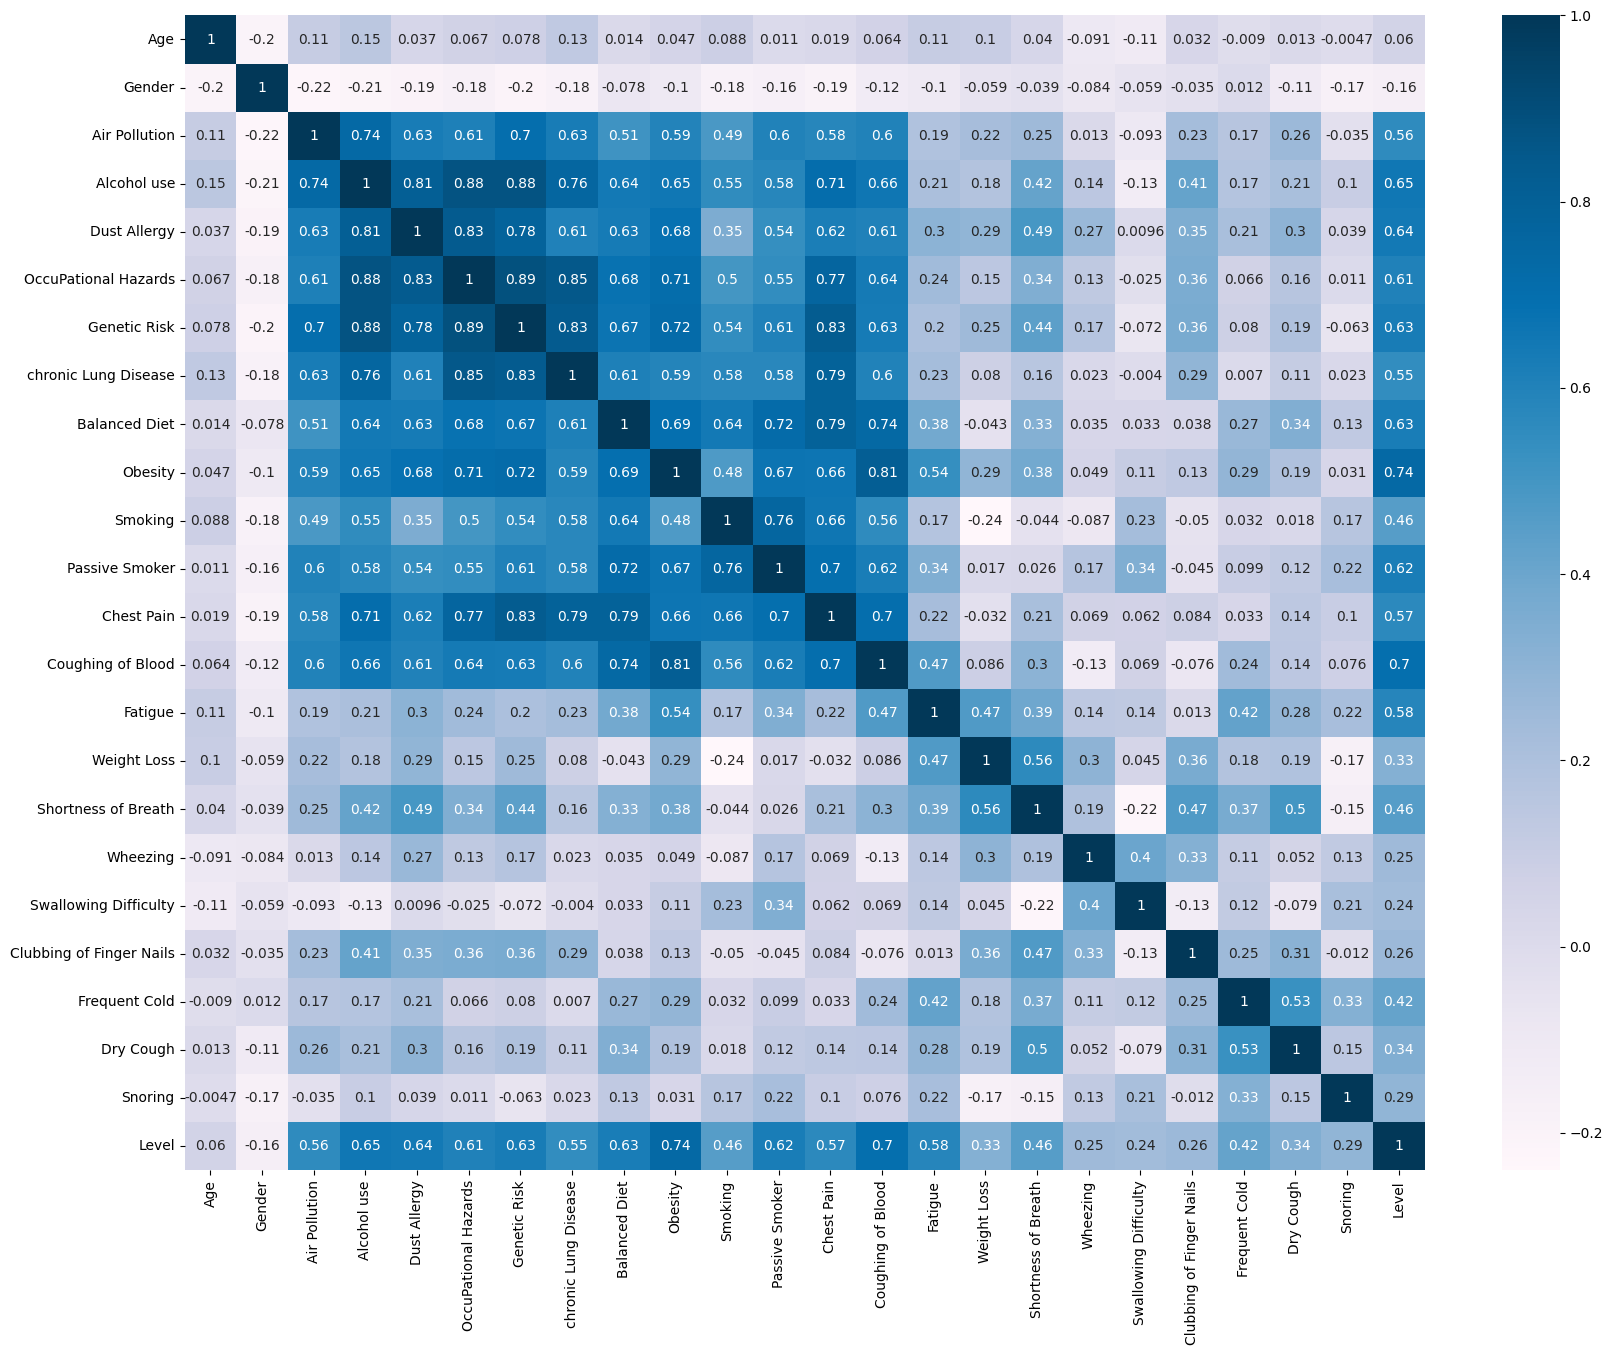

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

<AxesSubplot: >

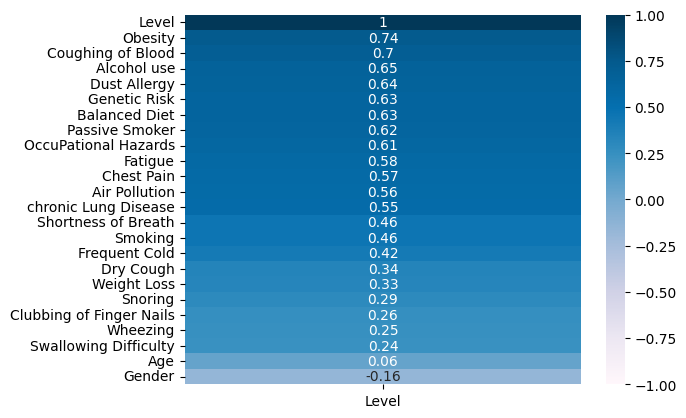

In [16]:
sns.heatmap(df_cancer.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuBu')

- It also shows us that obesity, alcohol use, balanced diet, Genetic risk, occupational hazards is strong correlated with lung caner, therefore we should be alert when these factors occur to us.

###### $Features Distribution$

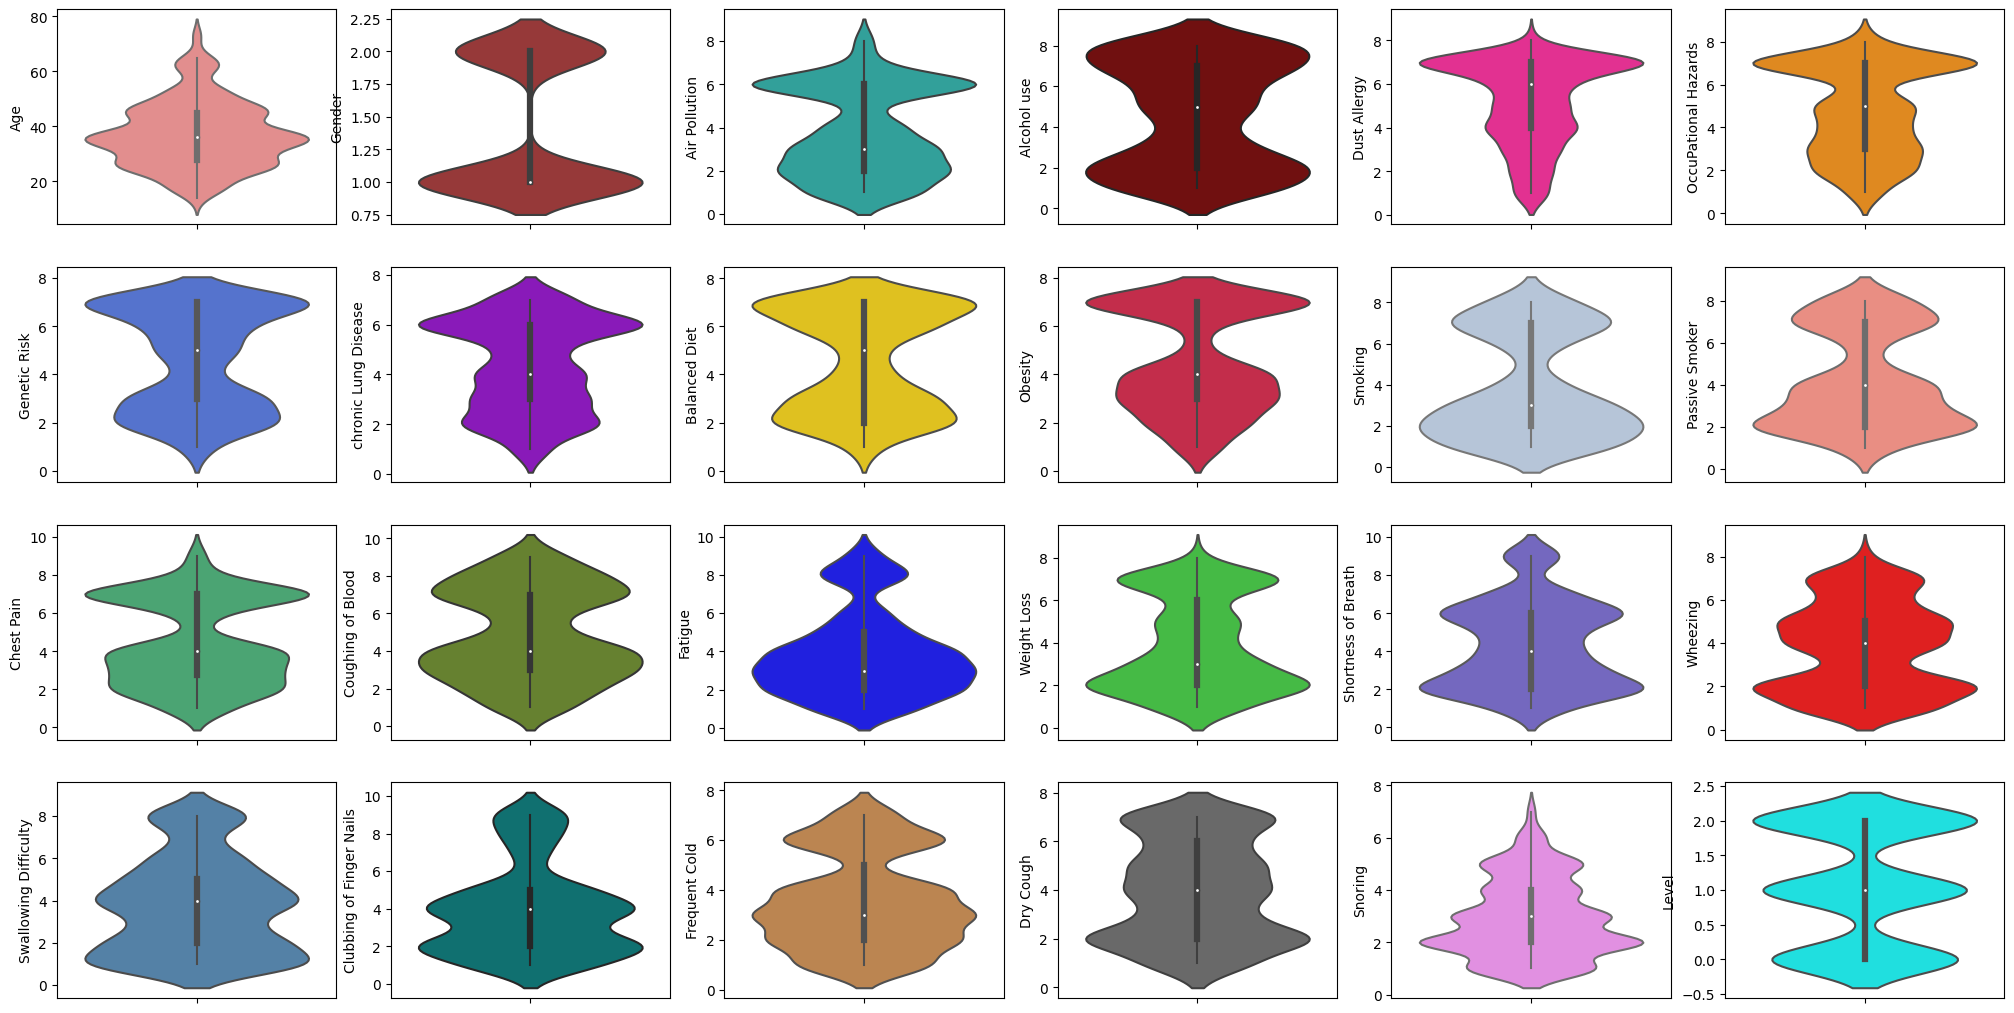

In [17]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(20, 10))
colors = ['lightcoral','brown','lightseagreen','maroon','deeppink','darkorange',
          'royalblue','darkviolet','gold','crimson','lightsteelblue','salmon','mediumseagreen',
          'olivedrab','blue','limegreen','slateblue','red','steelblue','teal','peru','dimgray','violet','cyan']
ax = ax.flatten()
i = 0

for col,_ in df_cancer.items():
    sns.violinplot(y=col, data=df_cancer, ax=ax[i],color=colors[i])
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)

<AxesSubplot: xlabel='Age', ylabel='Coughing of Blood'>

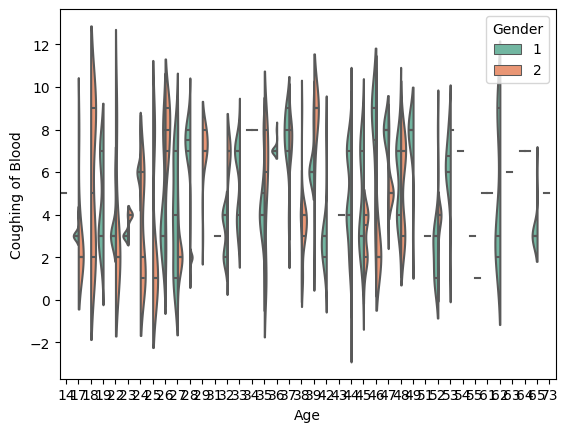

In [18]:
sns.violinplot(x="Age", y="Coughing of Blood", hue="Gender",data=df_cancer, palette="Set2", 
               split=True,scale="count", inner="quartile")

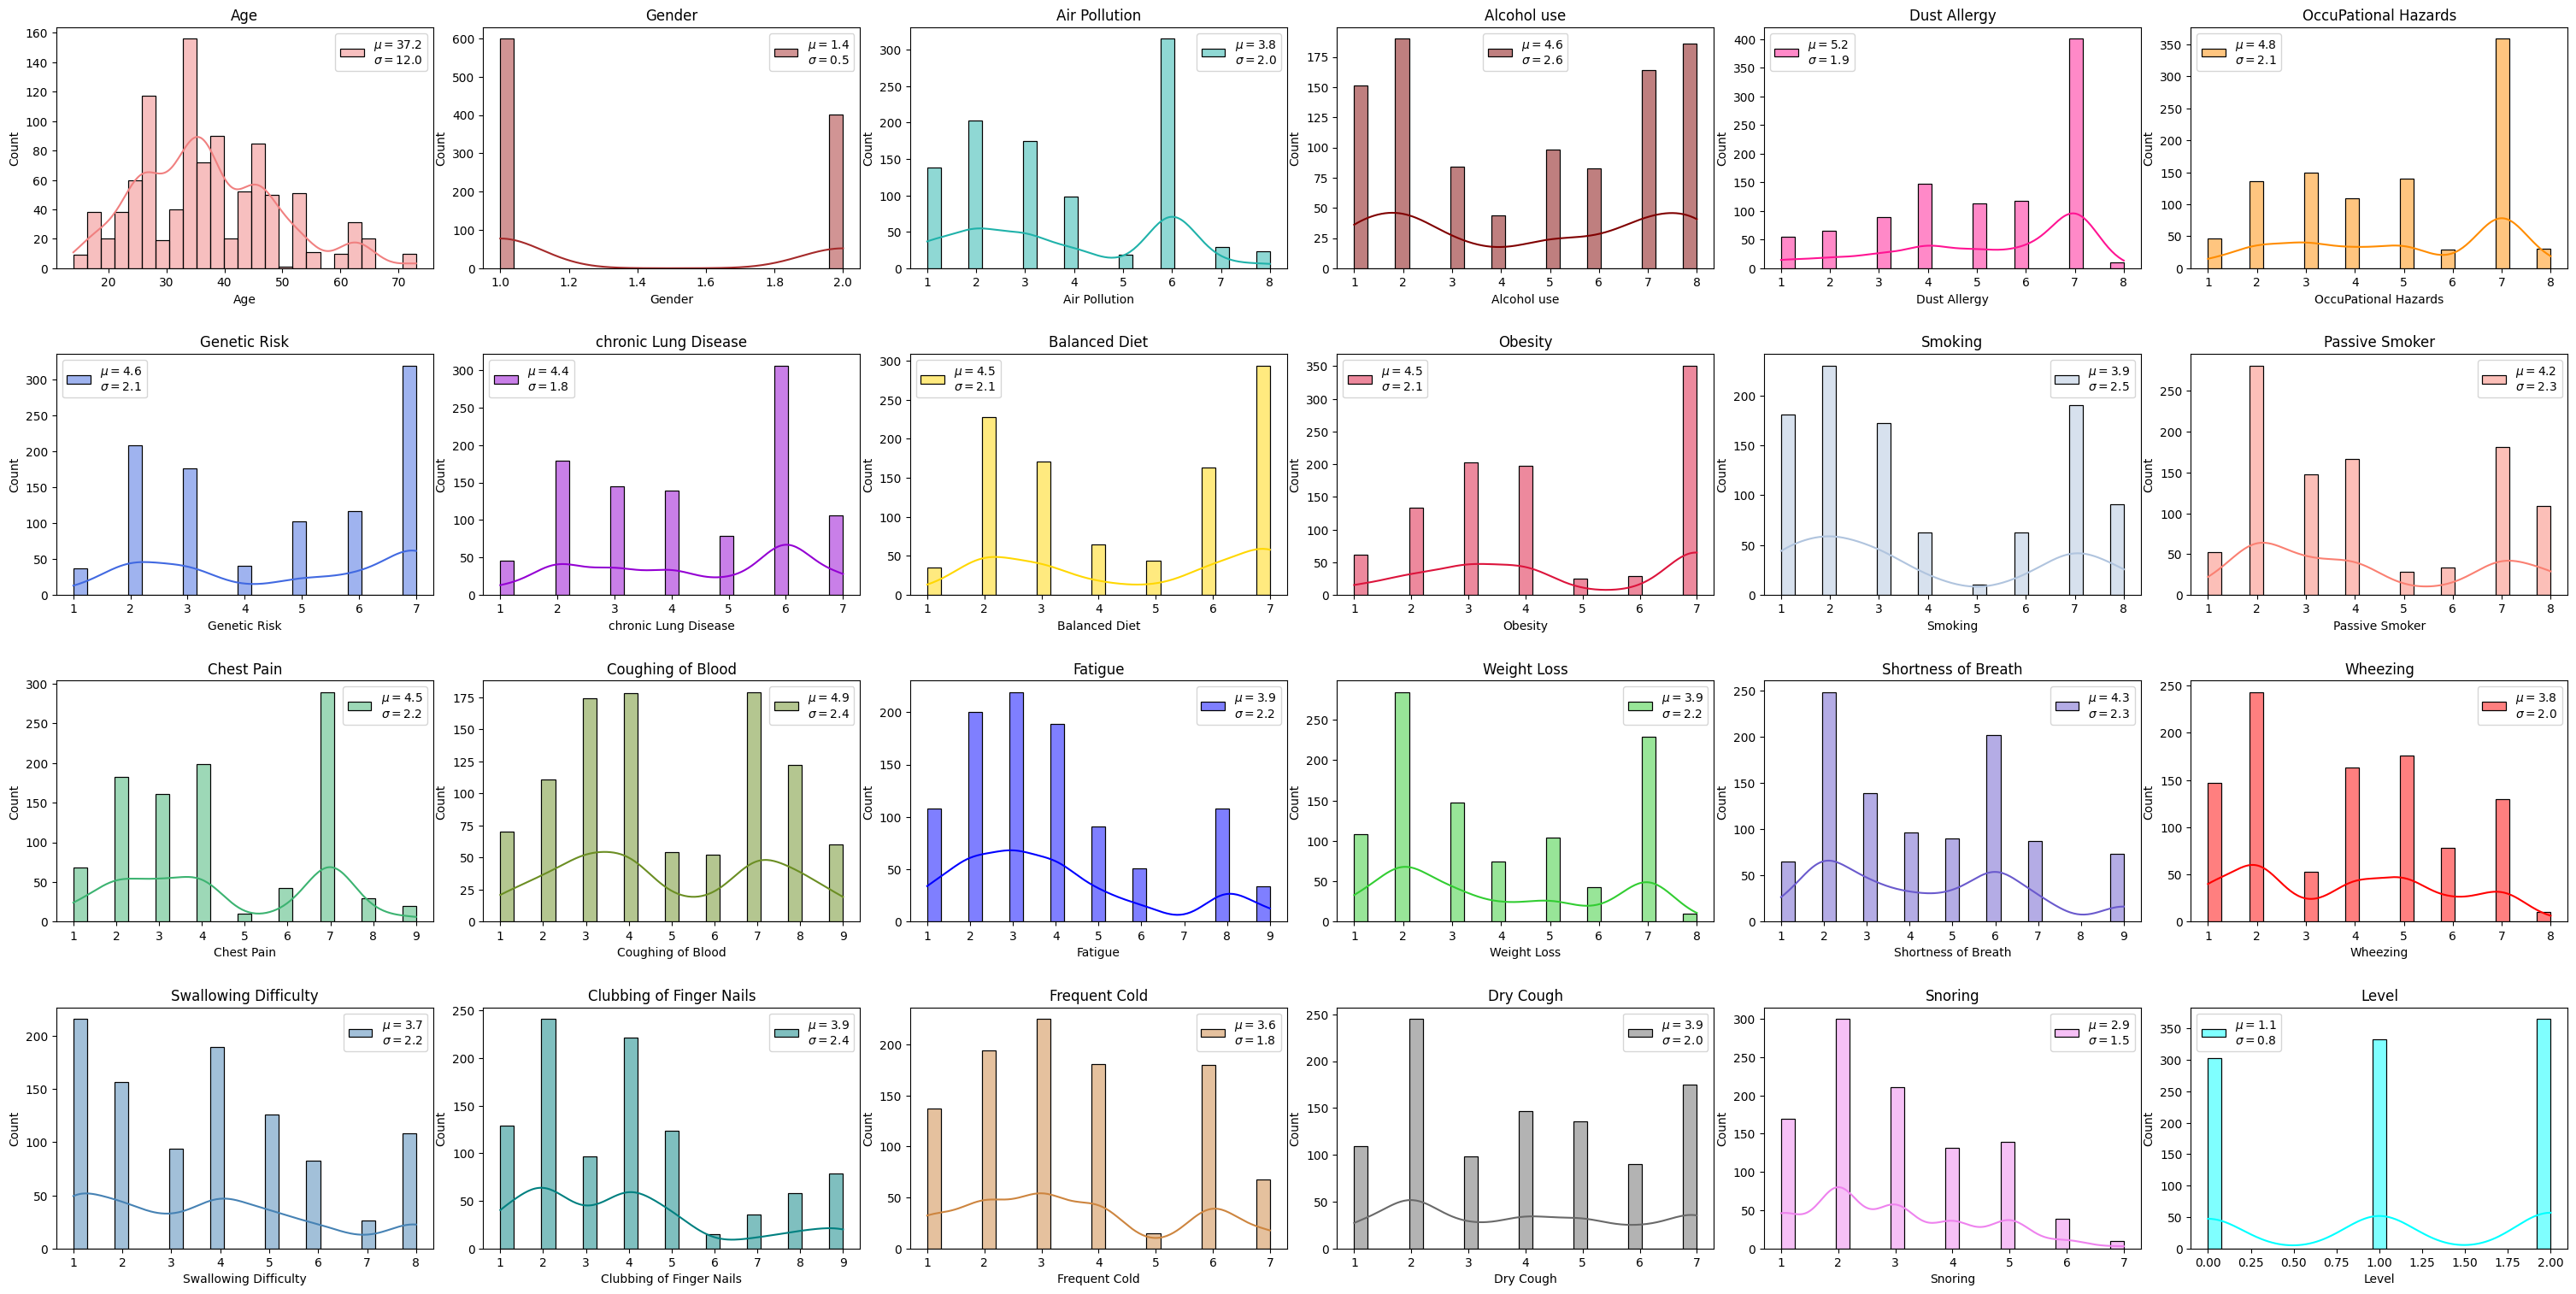

In [19]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(30, 15))
colors = ['lightcoral','brown','lightseagreen','maroon','deeppink','darkorange',
          'royalblue','darkviolet','gold','crimson','lightsteelblue','salmon','mediumseagreen',
          'olivedrab','blue','limegreen','slateblue','red','steelblue','teal','peru','dimgray','violet','cyan']
ax = ax.flatten()
i = 0

for k, v in df_cancer.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 color=colors[i],
                 kde=True,
                 bins=25,
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k}')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

###### $Correlated Features$

In [20]:
correlationF=[]
for column in df_cancer.columns :
    for columnF in df_cancer.columns:
        a = df_cancer[column].corr(df_cancer[columnF])
        if abs(a) > 0.8 and (column != columnF) :
            if a in correlationF:
                continue
            else :
                correlationF.append(a)         
                print (column +" column has high correlation with column "+ columnF)
                print(df_cancer[column].corr(df_cancer[columnF]))
                print("\n")

Alcohol use column has high correlation with column Dust Allergy
0.8081404294816877


Alcohol use column has high correlation with column OccuPational Hazards
0.8759999870274516


Alcohol use column has high correlation with column Genetic Risk
0.8753437832140992


Dust Allergy column has high correlation with column OccuPational Hazards
0.8334516221329494


OccuPational Hazards column has high correlation with column Alcohol use
0.8759999870274517


OccuPational Hazards column has high correlation with column Genetic Risk
0.886450303084691


OccuPational Hazards column has high correlation with column chronic Lung Disease
0.8527289930987237


Genetic Risk column has high correlation with column Alcohol use
0.8753437832140993


Genetic Risk column has high correlation with column chronic Lung Disease
0.8338324501001405


Genetic Risk column has high correlation with column Chest Pain
0.828226002978808


chronic Lung Disease column has high correlation with column OccuPational Hazards
0

###### Above calculation shows us that
- Alcohol Use has high correlation with Dust Allergy, Occupational Hazards and Genetic risk
- Occupational Hazards has high correlation with Dust Allergy, Genetic Risk, chronic Lung Disease
- Genetic risk has high correlation with chronic Lung Disease, Chest Pain
- Obesity has high correlation coughing of blood

<AxesSubplot: title={'center': 'Level Column Values'}, ylabel='Level'>

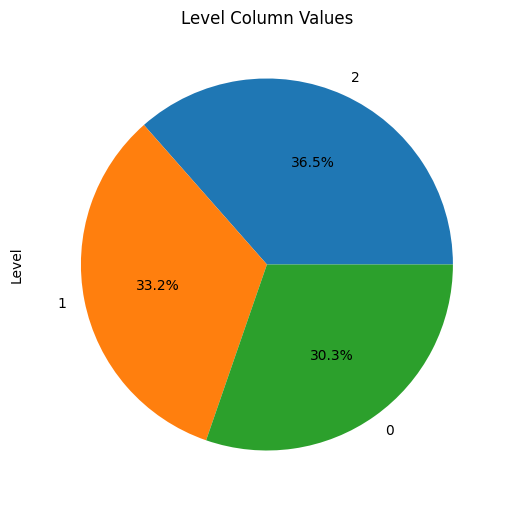

In [21]:
plt.title("Level Column Values")
df_cancer['Level'].value_counts().plot(kind='pie',figsize=(6,7),autopct='%1.1f%%')

- Q: How OccuPational Hazards influence Genetic Risk ? 

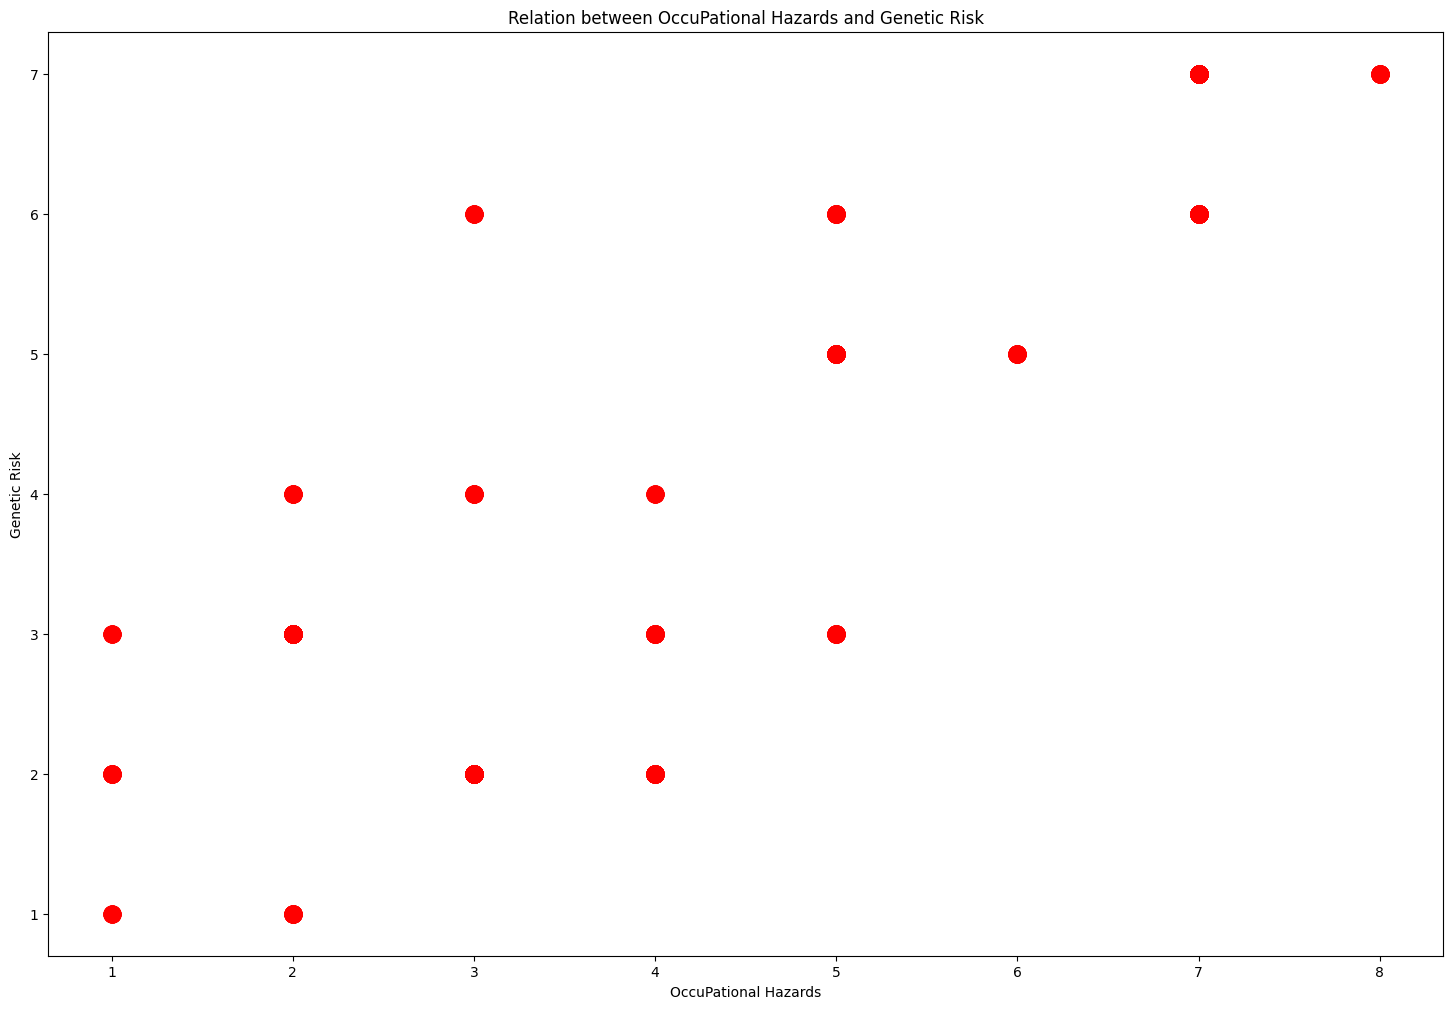

In [22]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer["Genetic Risk"],alpha=0.7,c="red",linewidths=7)

- There's a postive correlation between them as people with high genetic risk are having high occupational hazards

- Q: How OccuPational Hazards influence Dust Allergy ? 

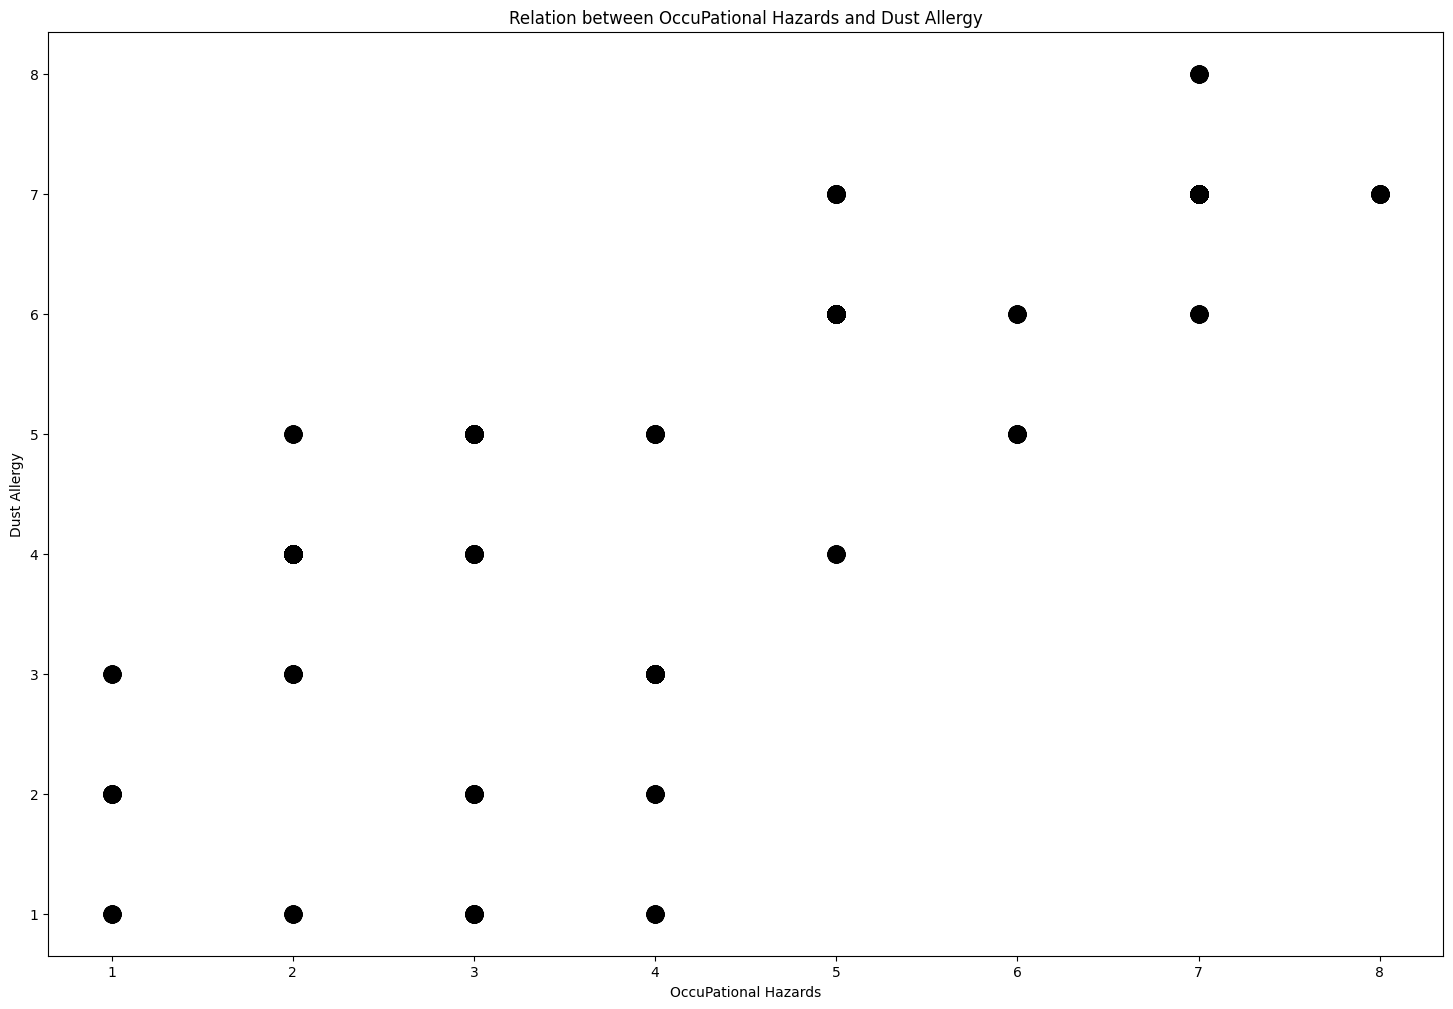

In [23]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Dust Allergy")
plt.title("Relation between OccuPational Hazards and Dust Allergy")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer["Dust Allergy"],alpha=0.7,c="black",linewidths=7)

- People with occupational hazards tend to have increased chances of Dust Allergy.

-  Q: How OccuPational Hazards influence chronic Lung Disease ?

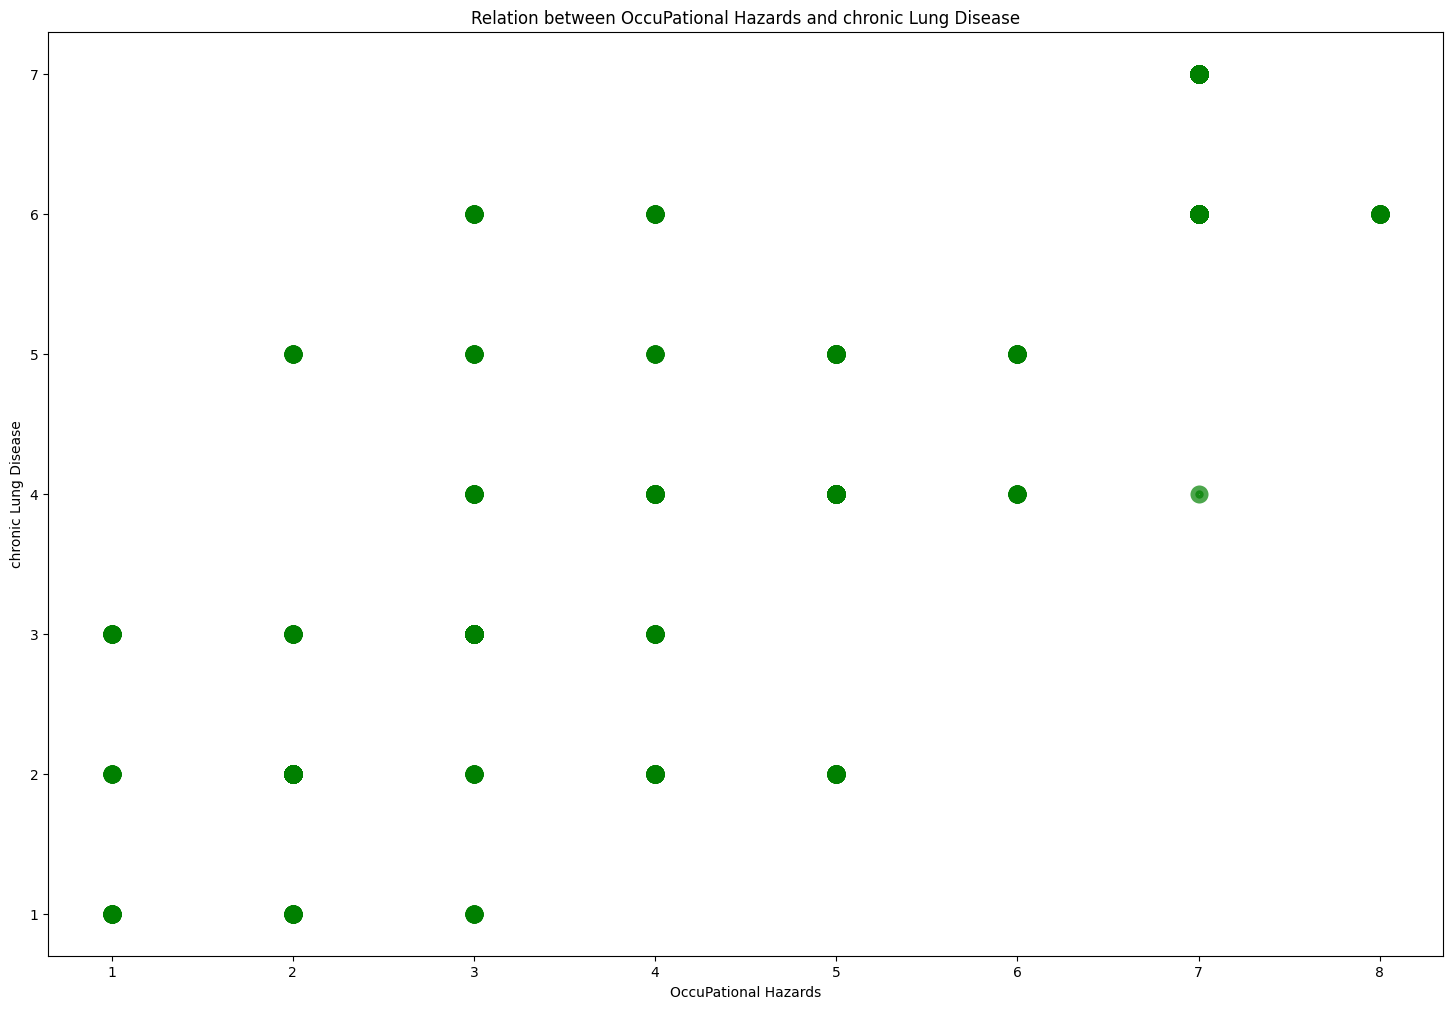

In [24]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("chronic Lung Disease")
plt.title("Relation between OccuPational Hazards and chronic Lung Disease")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer["chronic Lung Disease"],alpha=0.7,c="green",linewidths=7)

- People with high Occupational Hazards tend to have increased risks of chronic lung disease

- Q: What impact does OccuPational Hazards have on Alcohol consumption ?

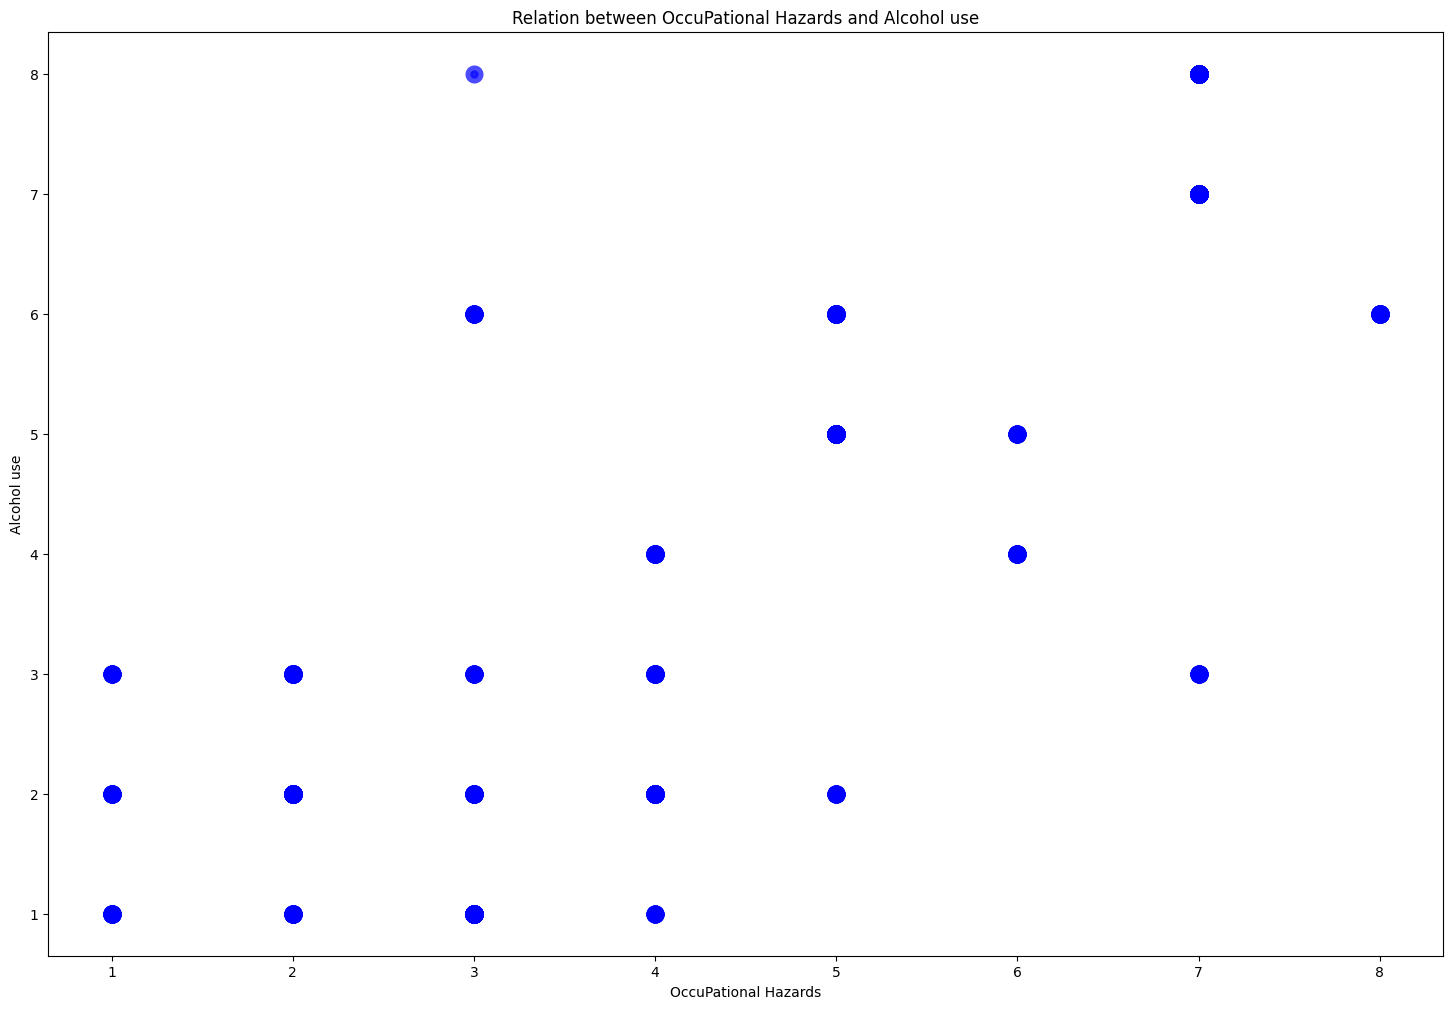

In [25]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Alcohol use")
plt.title("Relation between OccuPational Hazards and Alcohol use")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer['Alcohol use'],alpha=0.7,c="blue",linewidths=7)

<AxesSubplot: title={'center': 'Relation between Occupational Hazards and Alcohol Use'}, xlabel='OccuPational Hazards', ylabel='Alcohol use'>

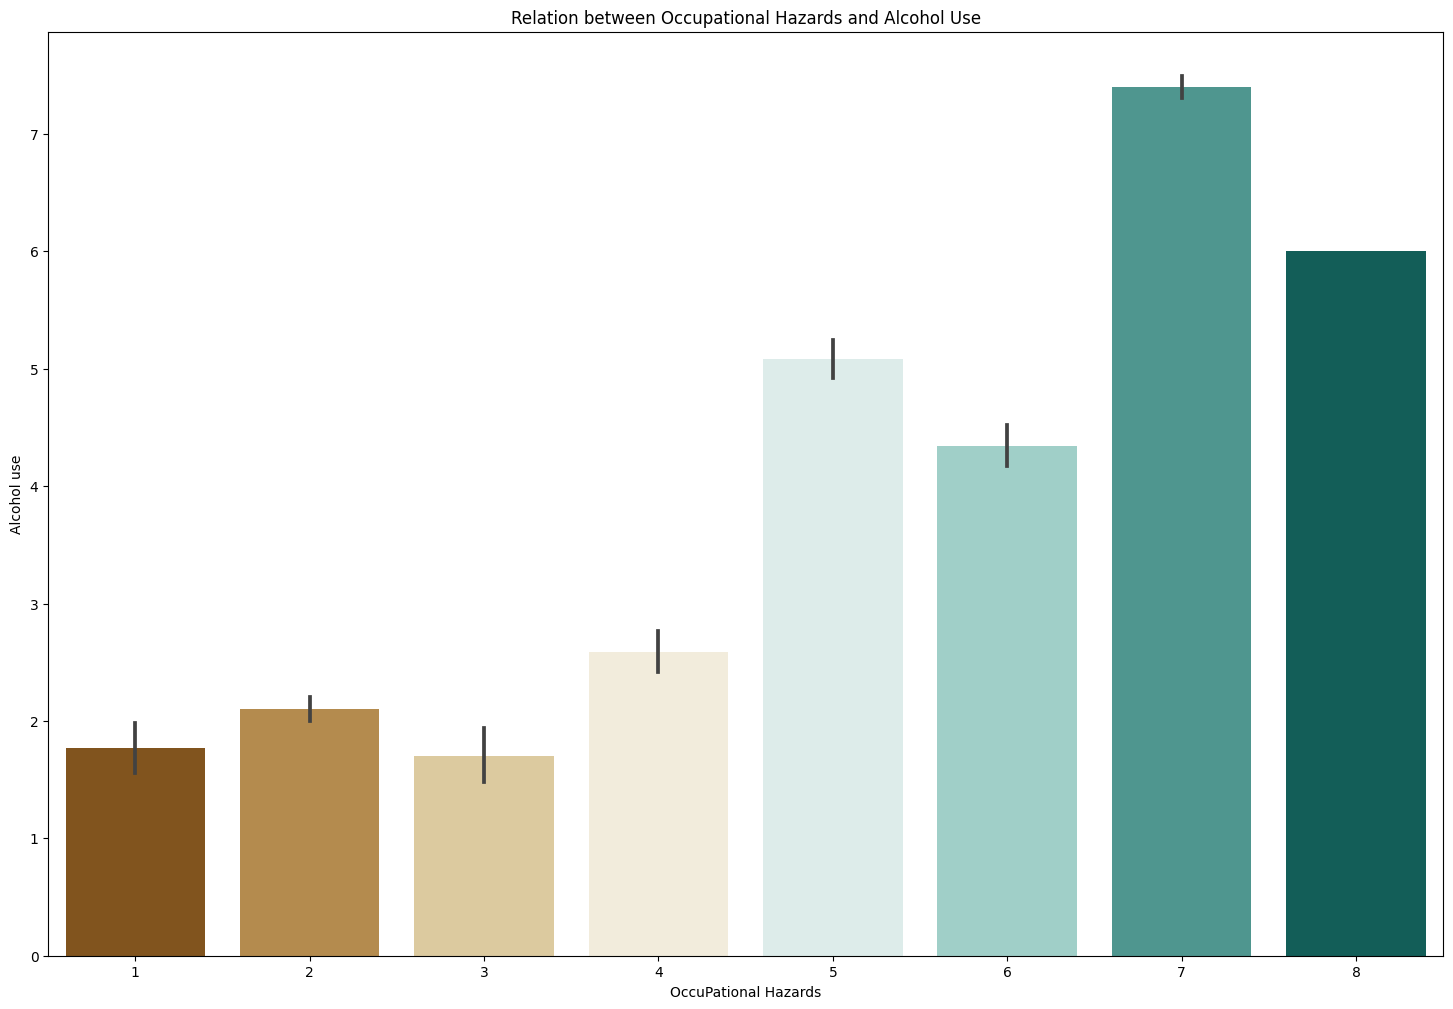

In [26]:
plt.figure(figsize=(18, 12))
plt.title("Relation between Occupational Hazards and Alcohol Use")
sns.barplot(data=df_cancer, x="OccuPational Hazards", y='Alcohol use',palette="BrBG")

- People with High Occupational Hazards tend to consume more Alcohol.

- Q: What is the Relation between Genetic Risk and chronic Lung Disease ?

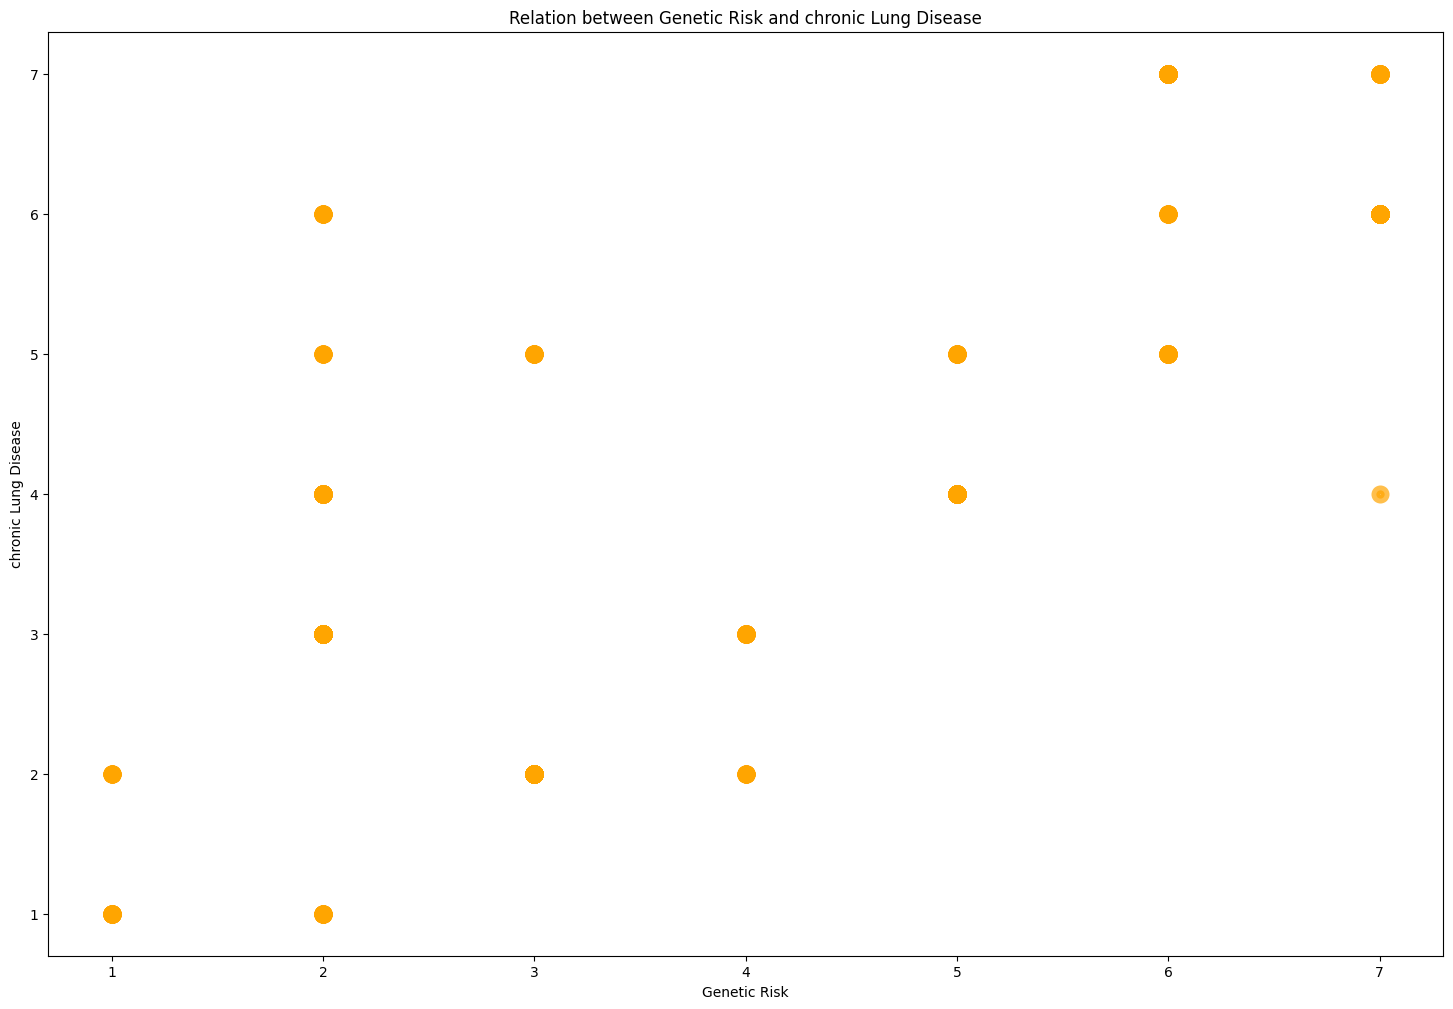

In [27]:
plt.figure(figsize=(18, 12))
plt.xlabel('Genetic Risk')
plt.ylabel('chronic Lung Disease')
plt.title("Relation between Genetic Risk and chronic Lung Disease")
plt.scatter(df_cancer['Genetic Risk'],df_cancer['chronic Lung Disease'],alpha=0.7,c="orange",linewidths=7)

- People with chronic lung disease tend to have more genetic risks

- Q: What is the Relation between Genetic Risk and Chest Pain ?

<AxesSubplot: title={'center': 'Relation between Genetic Risk and Chest Pain'}, xlabel='Genetic Risk', ylabel='Chest Pain'>

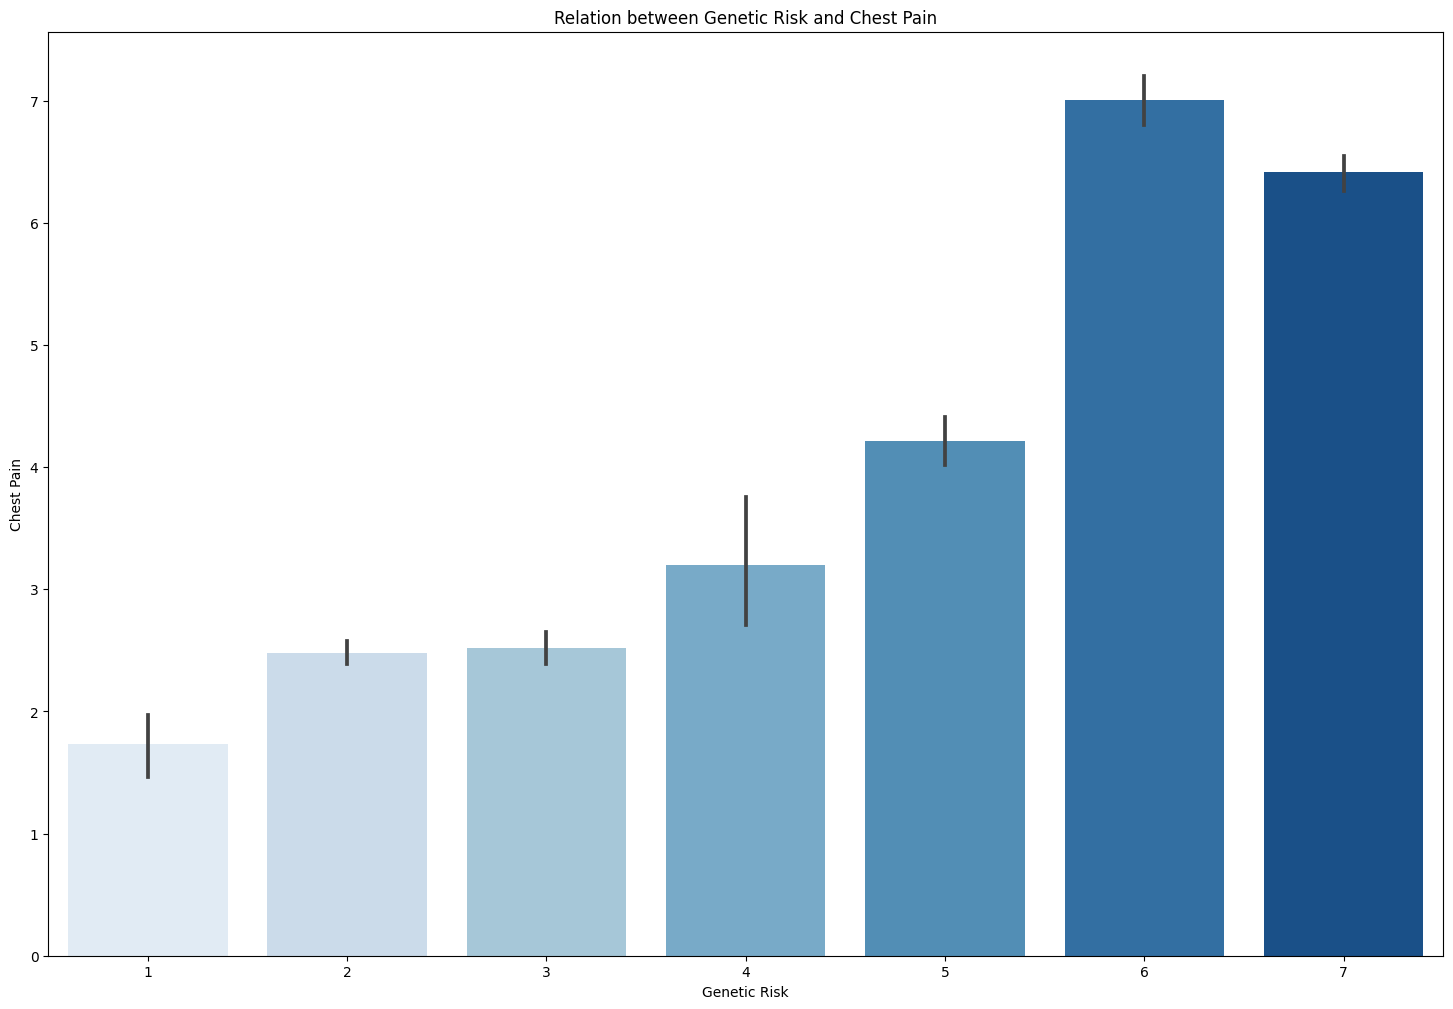

In [28]:
plt.figure(figsize=(18, 12))
plt.title("Relation between Genetic Risk and Chest Pain")
sns.barplot(data=df_cancer, x="Genetic Risk", y="Chest Pain",palette='Blues')

-  People with Chest Pain tend to have more genetic risks

- Q: How Obesity is affecting Coughing of blood level ?

<AxesSubplot: title={'center': 'Relation between Obesity and Coughing of Blood'}, xlabel='Obesity', ylabel='Coughing of Blood'>

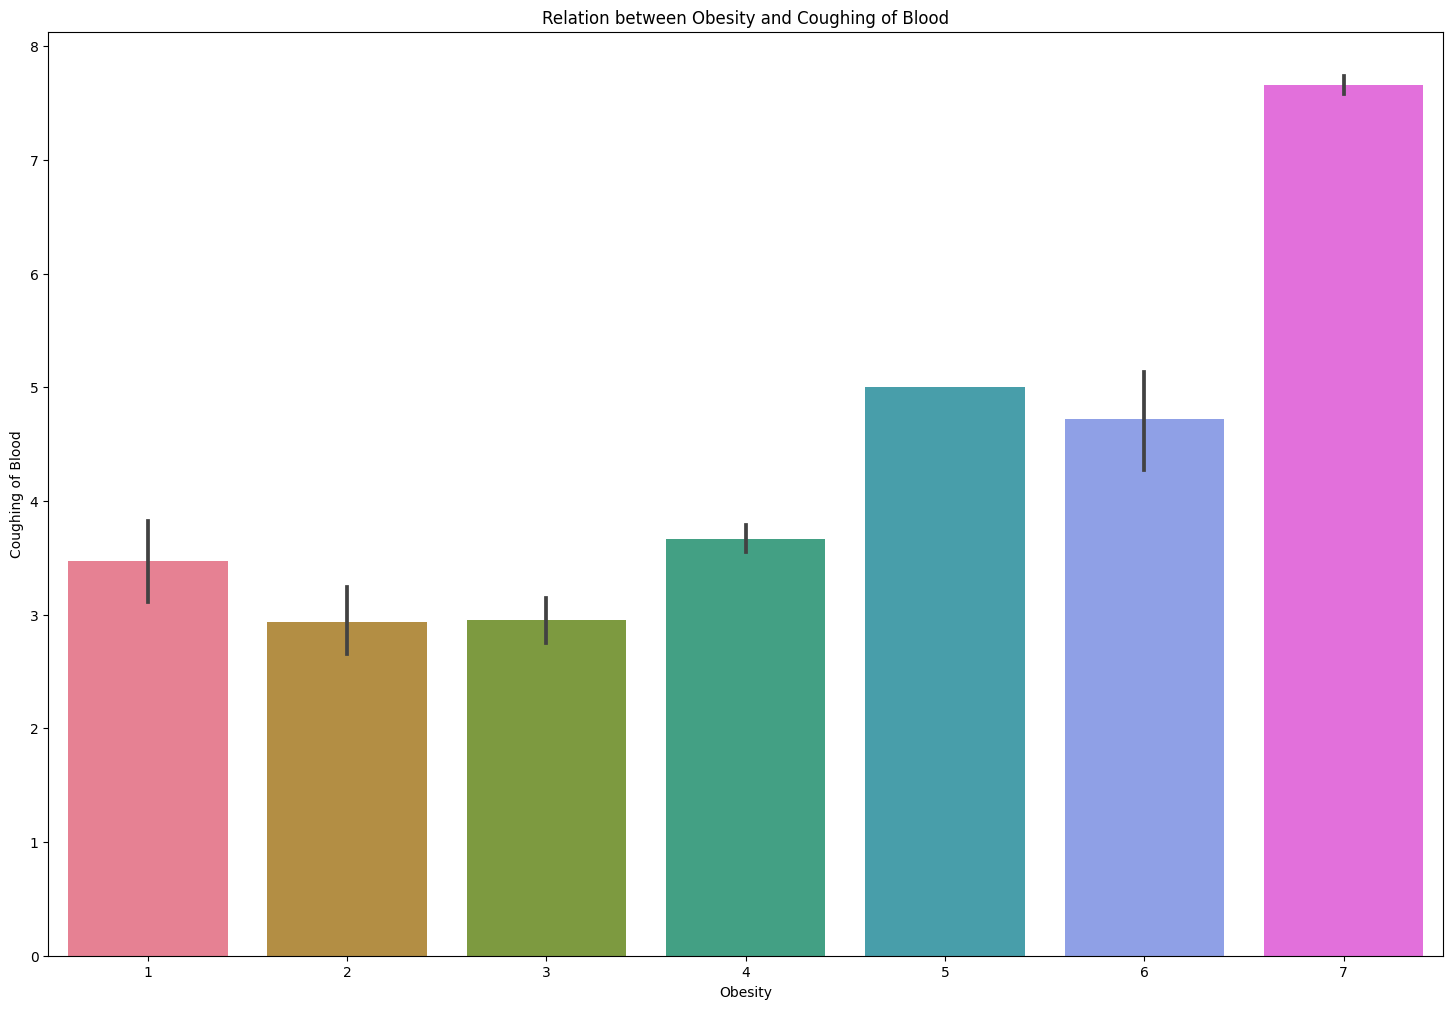

In [29]:
plt.figure(figsize=(18, 12))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df_cancer, x="Obesity", y="Coughing of Blood",palette="husl")

- As expected people with high obesity tends to have more coughing of blood

- Q: How many passive smokers do we have in our data?

<AxesSubplot: title={'center': 'Number of Passive Smokers'}, xlabel='Passive Smoker', ylabel='Count'>

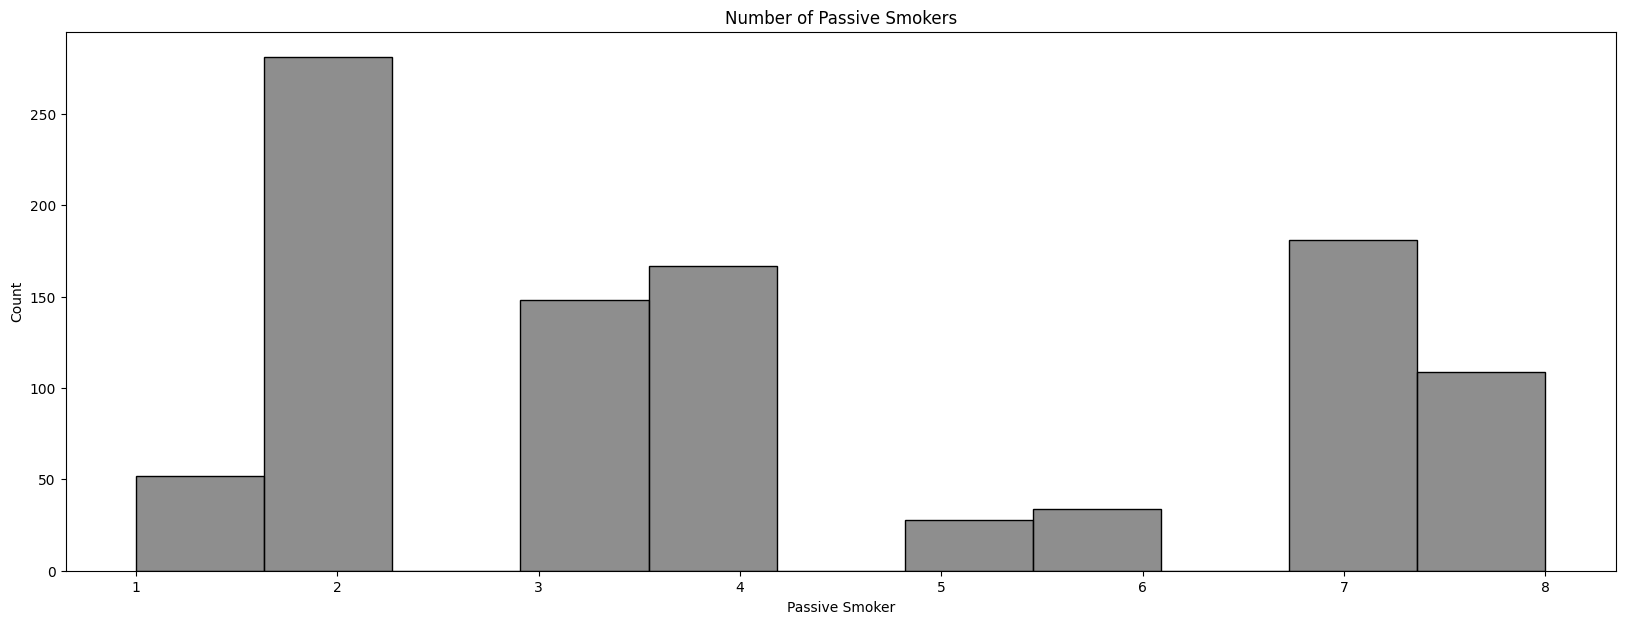

In [30]:
plt.subplots(figsize=(20, 7))
plt.title("Number of Passive Smokers")
sns.histplot(data=df_cancer, x=df_cancer["Passive Smoker"],color= "dimgray")

- Most Passive Smokers are Smoking in low values.

- Q: Who is drinking the most alcohols ?

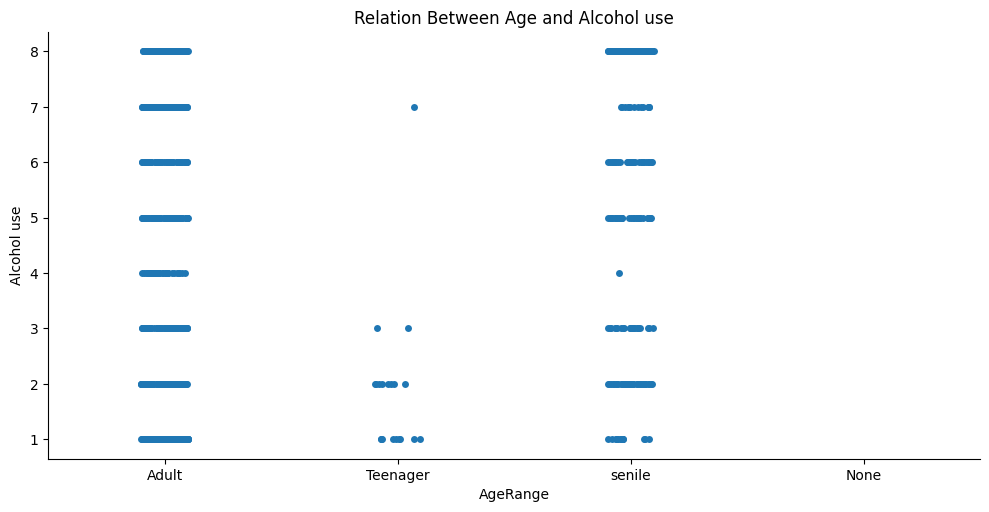

In [31]:
dfcopy= df_cancer.copy()

dfcopy['AgeRange'] = None
dfcopy.loc[(dfcopy['Age'] > 14) & (dfcopy["Age"] < 18), 'AgeRange'] = "Teenager"
dfcopy.loc[(dfcopy['Age'] > 18) & (dfcopy["Age"] < 45), 'AgeRange'] = "Adult"
dfcopy.loc[(dfcopy['Age'] > 45) & (dfcopy["Age"] < 74), 'AgeRange'] = "senile"

sns.catplot(data=dfcopy, x="AgeRange", y="Alcohol use",aspect=20/10,height=5).set(title='Relation Between Age and Alcohol use')

- Adults are the most people to drink alcohols ( 18 < Adults < 45 )

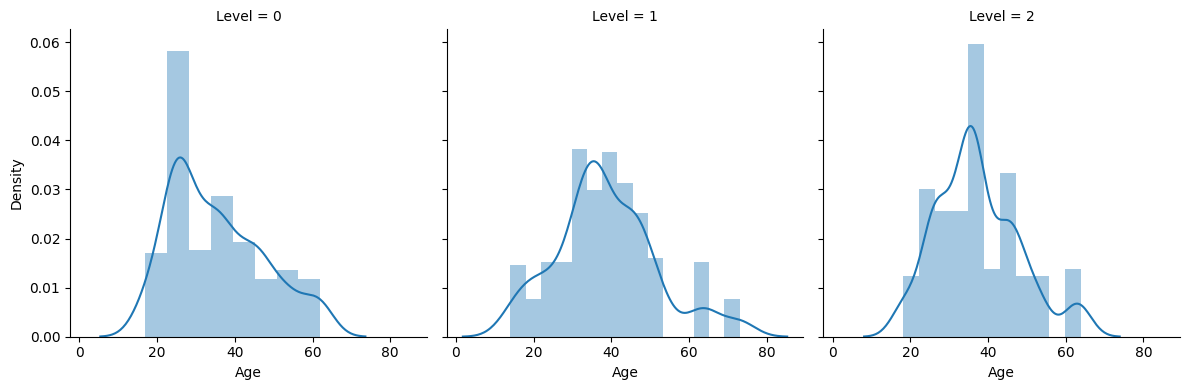

In [32]:
sea = sns.FacetGrid(df_cancer, col = "Level", height = 4)
sea.map(sns.distplot, "Age")

- Q: What is the Relation between Obesity and Level of lung cancer ?

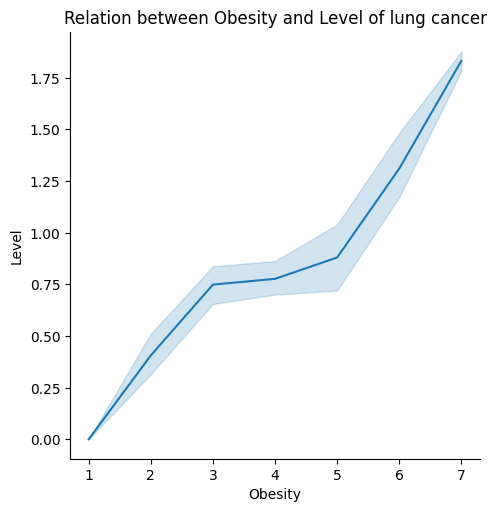

In [33]:
sns.relplot(data=df_cancer, x="Obesity", y="Level", kind="line")
plt.title("Relation between Obesity and Level of lung cancer")
plt.show()

- Obesity and the Level of lung cancer are Highly correlated to each other.

- Q: How Air Pollution is affecting lung cancer level?

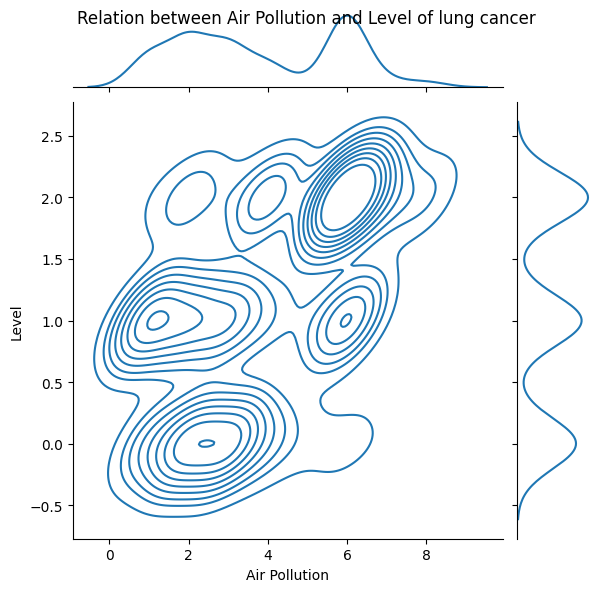

In [34]:
sns.jointplot(data=df_cancer, x='Air Pollution', y='Level', kind="kde")
plt.suptitle("Relation between Air Pollution and Level of lung cancer")
plt.show()

- From above plot we can see that Air pollution is moderately correlated with the Level of lung cancer

- Q: How Coughing of blood is affecting lung cancer level?

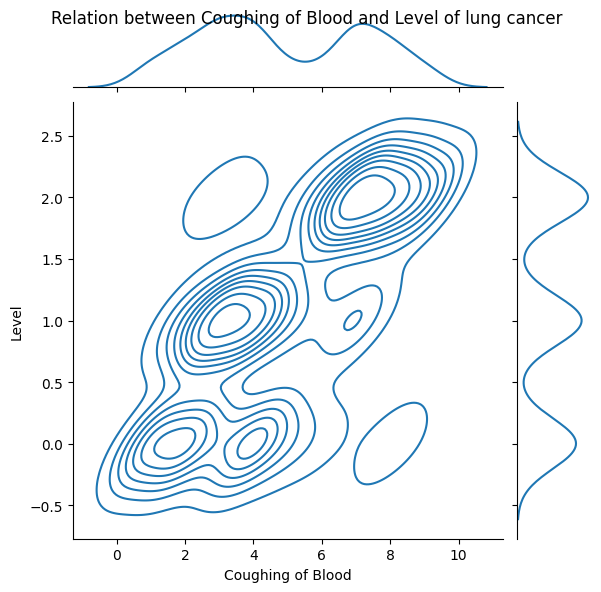

In [35]:
sns.jointplot(data=df_cancer, x='Coughing of Blood', y='Level', kind="kde")
plt.suptitle("Relation between Coughing of Blood and Level of lung cancer")
plt.show()

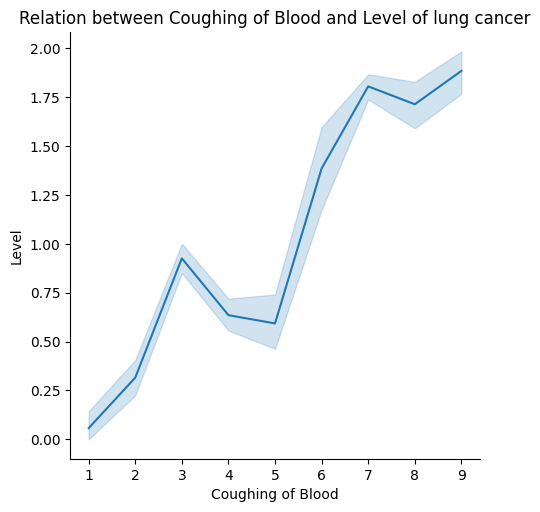

In [36]:
sns.relplot(data=df_cancer, x="Coughing of Blood", y="Level", kind="line")
plt.title("Relation between Coughing of Blood and Level of lung cancer")
plt.show()

- People with increased risk of lung cancer tend to cough blood more often.

- Q: How Passive Smoking is affecting lung cancer level?

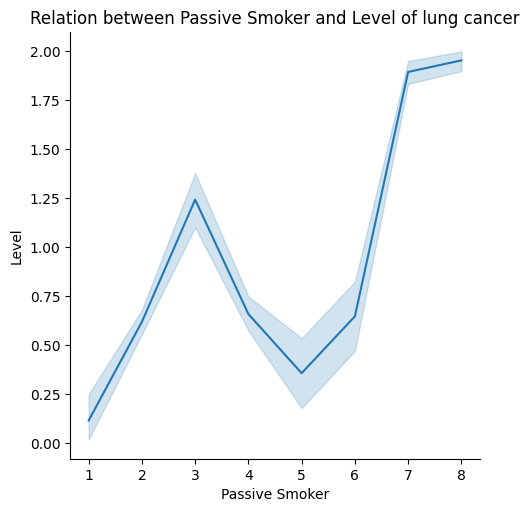

In [37]:
sns.relplot(data=df_cancer, x="Passive Smoker", y="Level",kind='line')
plt.title("Relation between Passive Smoker and Level of lung cancer")
plt.show()

- As expected, Passive smokers have good amount of tendency of getting affected with lung cancer.

- Q: How Alcohol Use is affecting lung cancer level?

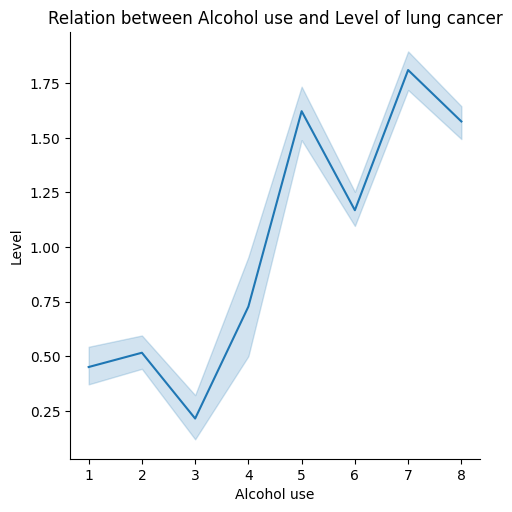

In [38]:
sns.relplot(data=df_cancer, x="Alcohol use", y="Level",kind='line')
plt.title("Relation between Alcohol use and Level of lung cancer")
plt.show()

- Q: How Dust allergy is affecting lung cancer level?

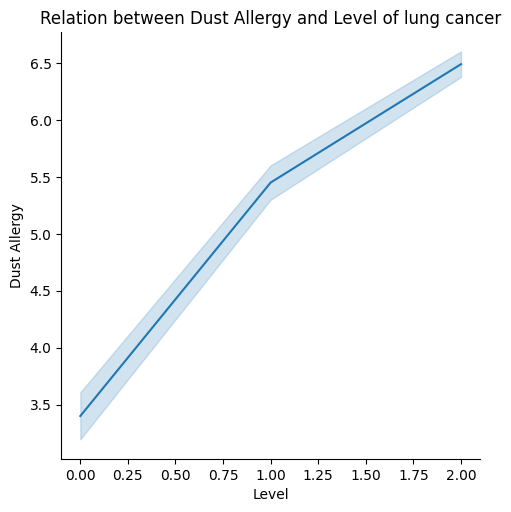

In [39]:
sns.relplot(
    data=df_cancer, kind="line",
    y="Dust Allergy", x="Level")
plt.title("Relation between Dust Allergy and Level of lung cancer")
plt.show()


## $Train$ $Test$ $Split$  $and$  $Model$ $Fitting$

- Split data between predictors and output variable

In [40]:
x = df_cancer.drop(["Level"],axis=1).values
y = df_cancer.Level.values

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [42]:
x_train

array([[44,  1,  2, ...,  3,  2,  3],
       [18,  2,  3, ...,  1,  4,  1],
       [38,  2,  1, ...,  4,  2,  5],
       ...,
       [24,  1,  6, ...,  1,  7,  6],
       [45,  2,  1, ...,  2,  3,  1],
       [28,  1,  6, ...,  1,  2,  1]], dtype=int64)

In [43]:
x_test

array([[45,  2,  1, ...,  4,  2,  5],
       [26,  1,  2, ...,  2,  3,  4],
       [35,  2,  4, ...,  2,  4,  1],
       ...,
       [61,  2,  2, ...,  2,  1,  2],
       [27,  2,  3, ...,  2,  6,  2],
       [17,  1,  3, ...,  1,  7,  2]], dtype=int64)

### $Decision Tree$

##### Function of Measure Performance

In [44]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Decision Tree Model')
    plt.show()

In [45]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred_train_DT = model_DT.predict(x_train)

In [47]:
y_pred_DT = model_DT.predict(x_test)

##### Confusion Matrix of Decision Tree Classifier Model Outcome 

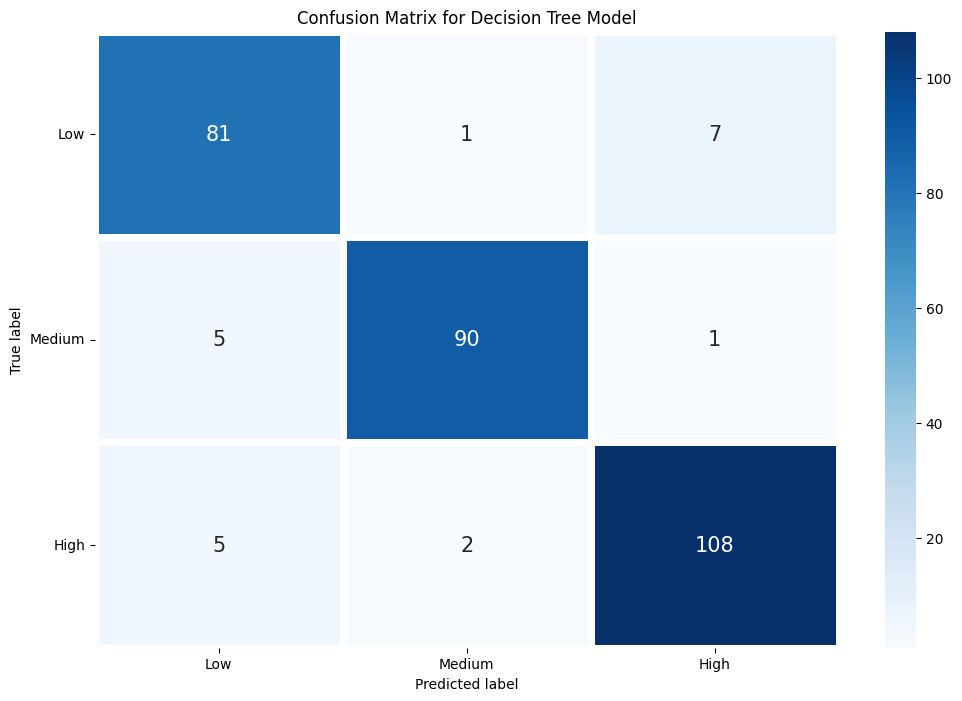

In [48]:
CM(y_test, y_pred_DT, col_names=['Low', 'Medium', 'High'])

##### Classification Report of Decision Tree Classifier Model

In [49]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        89
           1       0.97      0.94      0.95        96
           2       0.93      0.94      0.94       115

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [50]:
data=pd.DataFrame({'y_Test  ':y_test,'y_pred_DT ':y_pred_DT})
data[:20]

y_Test    y_pred_DT 
0          1           1
1          0           0
2          1           0
3          0           0
4          2           2
5          0           0
6          0           0
7          0           0
8          2           2
9          0           2
10         0           0
11         2           2
12         1           1
13         1           1
14         1           1
15         2           2
16         2           2
17         0           0
18         0           0
19         0           0

In [51]:
#Training Recall
recall_DT_training = recall_score(y_train, y_pred_train_DT, average = 'macro')
recall_DT_training

0.9986666666666667

In [52]:
#Testing Recall
recall_DT = recall_score(y_test, y_pred_DT, average = 'macro')
recall_DT

0.9289142647777235

##### Decision Tree Classifier Plot 

In [53]:
feature_names = df_cancer.columns[0:23]
viz = df_cancer.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


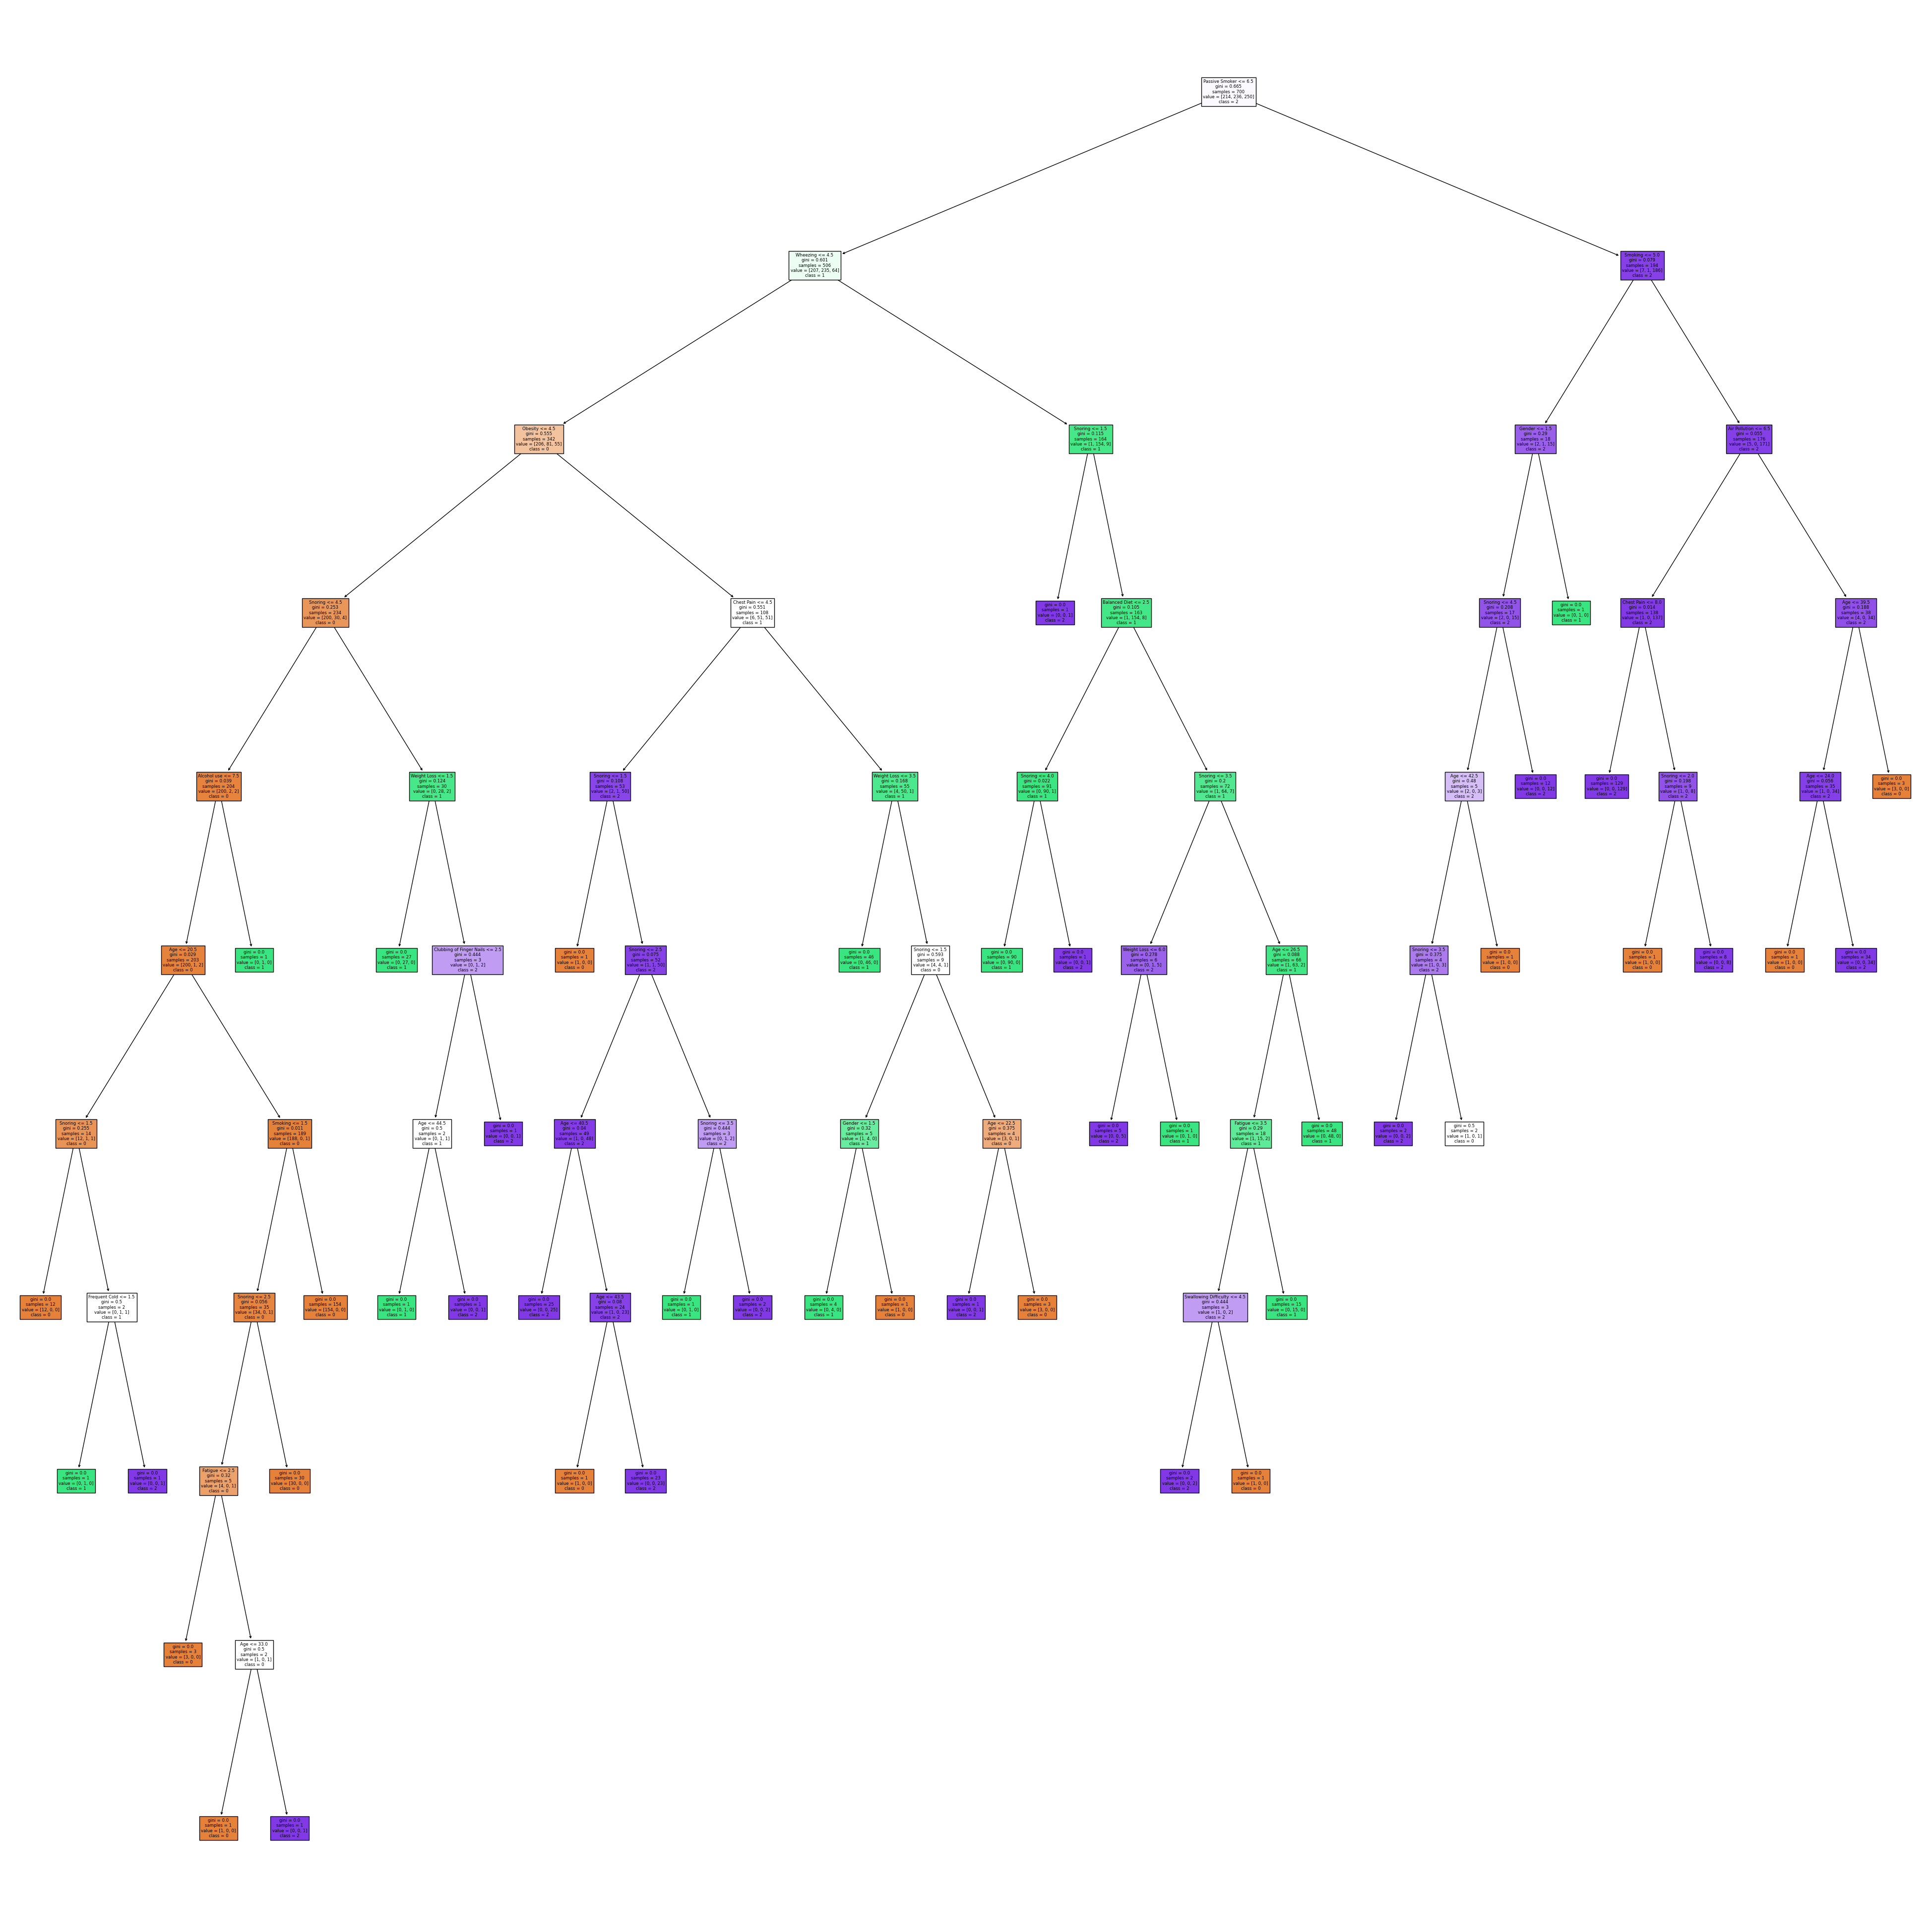

In [54]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(50,50))
plot_tree(model_DT, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

## $Random Forest$

In [55]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
y_pred_train_rf = model_rf.predict(x_train)

In [57]:
y_pred_rf = model_rf.predict(x_test)

##### Function of Measure Performance

In [58]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()

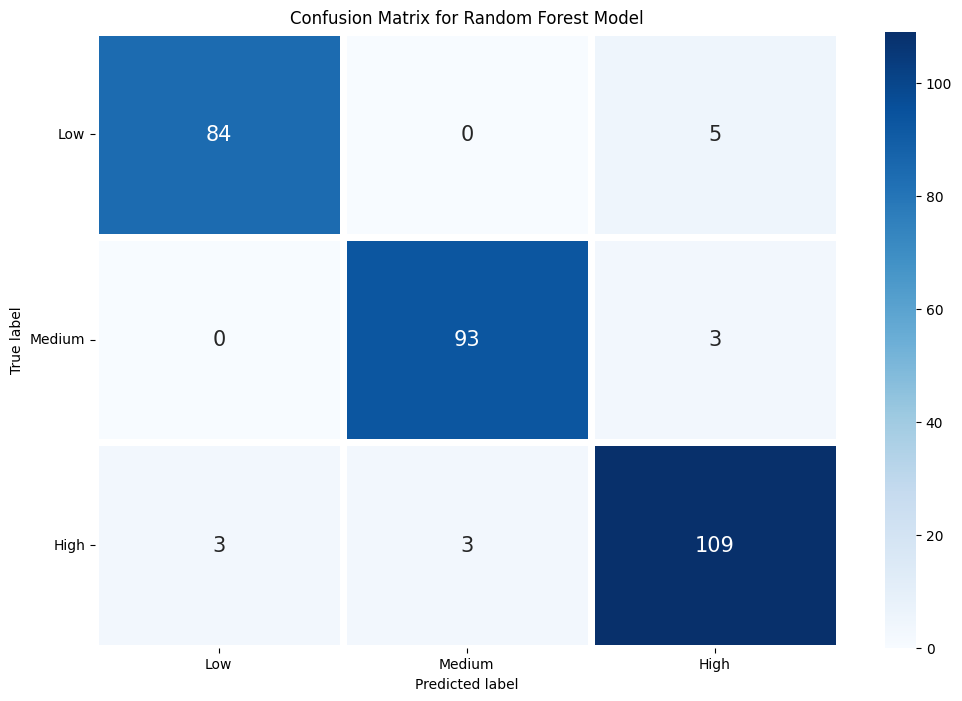

In [59]:
CM(y_test, y_pred_rf, col_names=['Low', 'Medium', 'High'])

##### Classification Report of Random Forest Classifier Model

In [60]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.97      0.97      0.97        96
           2       0.93      0.95      0.94       115

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [61]:
#Training Recall
recall_rf_training = recall_score(y_train, y_pred_train_rf, average = 'macro')
recall_rf_training

0.9986666666666667

In [62]:
#Testing Recall
recall_rf = recall_score(y_test, y_pred_rf, average = 'macro')
recall_rf

0.9534654372252076

## $KNN$ 

##### Function of Measure Performance

In [63]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for K Nearest Neighbours Model')
    plt.show()

In [64]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [65]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
y_pred_train_KNN=KNN.predict(x_train)

In [67]:
y_pred_KNN=KNN.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred_KNN ':y_pred_KNN})
data[:20]

y_Test    y_pred_KNN 
0          1            1
1          0            0
2          1            1
3          0            0
4          2            2
5          0            0
6          0            0
7          0            0
8          2            2
9          0            0
10         0            0
11         2            2
12         1            1
13         1            1
14         1            1
15         2            2
16         2            1
17         0            1
18         0            0
19         0            0

##### Confusion Matrix of K Nearest Neighbours Classifier Model Outcome 

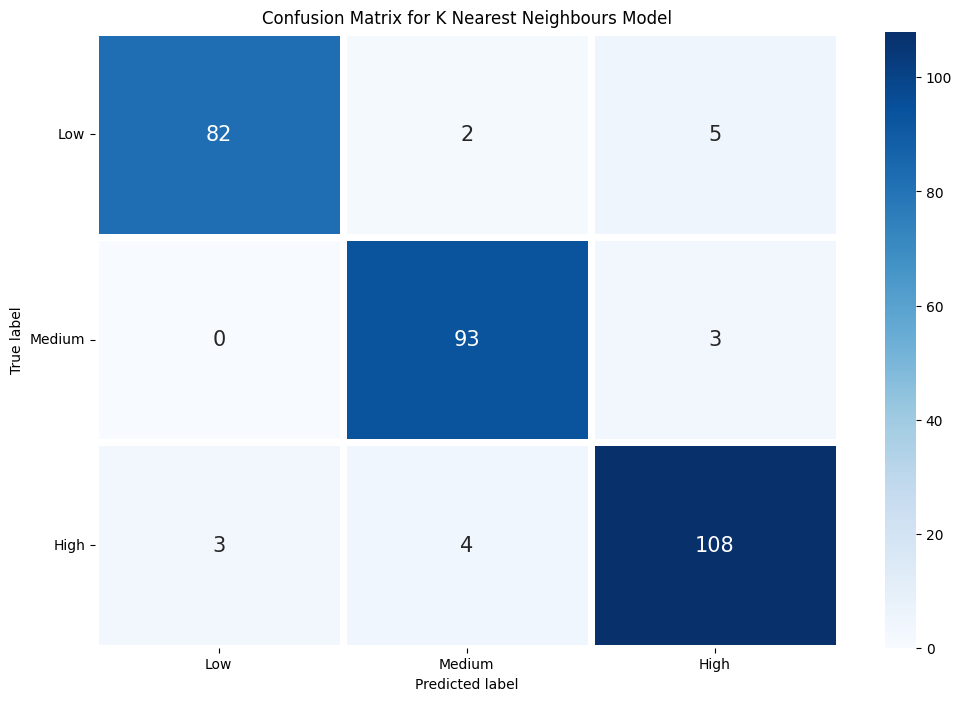

In [68]:
CM(y_test, y_pred_KNN, col_names=['Low', 'Medium', 'High'])

##### Classification Report of K Nearest Neighbours Classifier Model

In [69]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        89
           1       0.94      0.97      0.95        96
           2       0.93      0.94      0.94       115

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [70]:
#Training Recall
recall_KNN_train=recall_score(y_train, y_pred_train_KNN, average = 'micro')
recall_KNN_train

0.9542857142857143

In [71]:
# Testing Recall
recall_KNN=recall_score(y_test, y_pred_KNN, average = 'micro')
recall_KNN

0.9433333333333334

## $ Logistic Regression$

##### $VarianceInflationFactor$

In [72]:
x1= df_cancer.iloc[:, 0:23]
x1['adding an intercept']=1
x1

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              6            7             7   
1     17       1              1            3             2   
2     35       1              6            8             7   
3     37       1              4            5             6   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              4            5             6   
996   37       2              2            4             5   
997   25       2              3            1             4   
998   18       2              4            5             6   
999   47       1              2            3             4   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       7             7                     6              7   
1                       4             2                     6              2   
2                       7             6                     7              7   
3                       5             5                     4              6   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     5             5                     4              6   
996                     4             3                     2              2   
997                     3             2                     3              4   
998                     5             6                     5              5   
999                     2             4                     3              3   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          7  ...        4            4                    5         6   
1          2  ...        4            2                    2         2   
2          3  ...        5            2                    5         2   
3          7  ...        8            7                    9         2   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        8            7                    9         2   
996        4  ...        3            4                    2         2   
997        3  ...        3            2                    2         4   
998        5  ...        1            4                    3         2   
999        3  ...        1            2                    4         6   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        5                         5              4   
1                        3                         2              1   
2                        3                         2              1   
3                        1                         4              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      1                         4              6   
996                      3                         1              2   
997                      2                         2              3   
998                      4                         6              2   
999                      5                         4              2   

     Dry Cough  Snoring  adding an intercept  
0            6        4                    1  
1            2        2                    1  
2            7        2                    1  
3            7        5                    1  
4            2        3                    1  
..         ...      ...                  ...  
995          7        3                    1  
996          3        4                    1  
997          4        2                    1  
998          4        3                    1  
999          1        2                 

- We dont know the actual equation of the regression line thats why we cannot assume that the intercept term is zero.
- If we add the intercept term then all of the variances of the features map to the intercept term thats why a shrinkage is happened thats why all of the variances due to the features reduced

In [73]:
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns

In [74]:
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]

print(vif_data)

                     feature        VIF
0                        Age   1.206692
1                     Gender   1.251140
2              Air Pollution   3.953936
3                Alcohol use  15.650494
4               Dust Allergy   6.343790
5       OccuPational Hazards  19.840382
6               Genetic Risk  18.835665
7       chronic Lung Disease   9.077127
8              Balanced Diet   7.096706
9                    Obesity   8.072554
10                   Smoking   5.048938
11            Passive Smoker   7.718687
12                Chest Pain   7.683145
13         Coughing of Blood   8.256502
14                   Fatigue   3.914946
15               Weight Loss   3.676325
16       Shortness of Breath   4.652902
17                  Wheezing   2.633458
18     Swallowing Difficulty   3.265787
19  Clubbing of Finger Nails   2.875366
20             Frequent Cold   2.537717
21                 Dry Cough   2.240886
22                   Snoring   1.877265
23       adding an intercept  65.441336


In [75]:
df_cancer.drop(columns=['Alcohol use','OccuPational Hazards','Genetic Risk','Balanced Diet','Obesity'], axis=1, inplace=True)
df_cancer

Age  Gender  Air Pollution  Dust Allergy  chronic Lung Disease  Smoking  \
0     33       1              6             7                     6        4   
1     17       1              1             2                     6        2   
2     35       1              6             7                     7        8   
3     37       1              4             6                     4        2   
4     46       1              6             7                     6        8   
..   ...     ...            ...           ...                   ...      ...   
995   44       1              4             6                     4        2   
996   37       2              2             5                     2        3   
997   25       2              3             4                     3        1   
998   18       2              4             6                     5        6   
999   47       1              2             4                     3        2   

     Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  Weight Loss  \
0                 8           7                  7        4            4   
1                 1           3                  4        4            2   
2                 7           9                  6        5            2   
3                 3           4                  8        8            7   
4                 7           7                  9        3            2   
..              ...         ...                ...      ...          ...   
995               3           4                  8        8            7   
996               2           2                  4        3            4   
997               4           3                  1        3            2   
998               6           6                  5        1            4   
999               3           4                  4        1            2   

     Shortness of Breath  Wheezing  Swallowing Difficulty  \
0                      5         6                      5   
1                      2         2                      3   
2                      5         2                      3   
3                      9         2                      1   
4                      4         1                      4   
..                   ...       ...                    ...   
995                    9         2                      1   
996                    2         2                      3   
997                    2         4                      2   
998                    3         2                      4   
999                    4         6                      5   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                           5              4          6        4      0  
1                           2              1          2        2      1  
2                           2              1          7        2      2  
3                           4              6          7        5      2  
4                           2              4          2        3      2  
..                        ...            ...        ...      ...    ...  
995                         4              6          7        3      2  
996                         1              2          3        4      2  
997                         2              3          4        2      2  
998                         6              2          4        3      2  
999                         4              2          1        2      2  

[1000 rows x 19 columns]

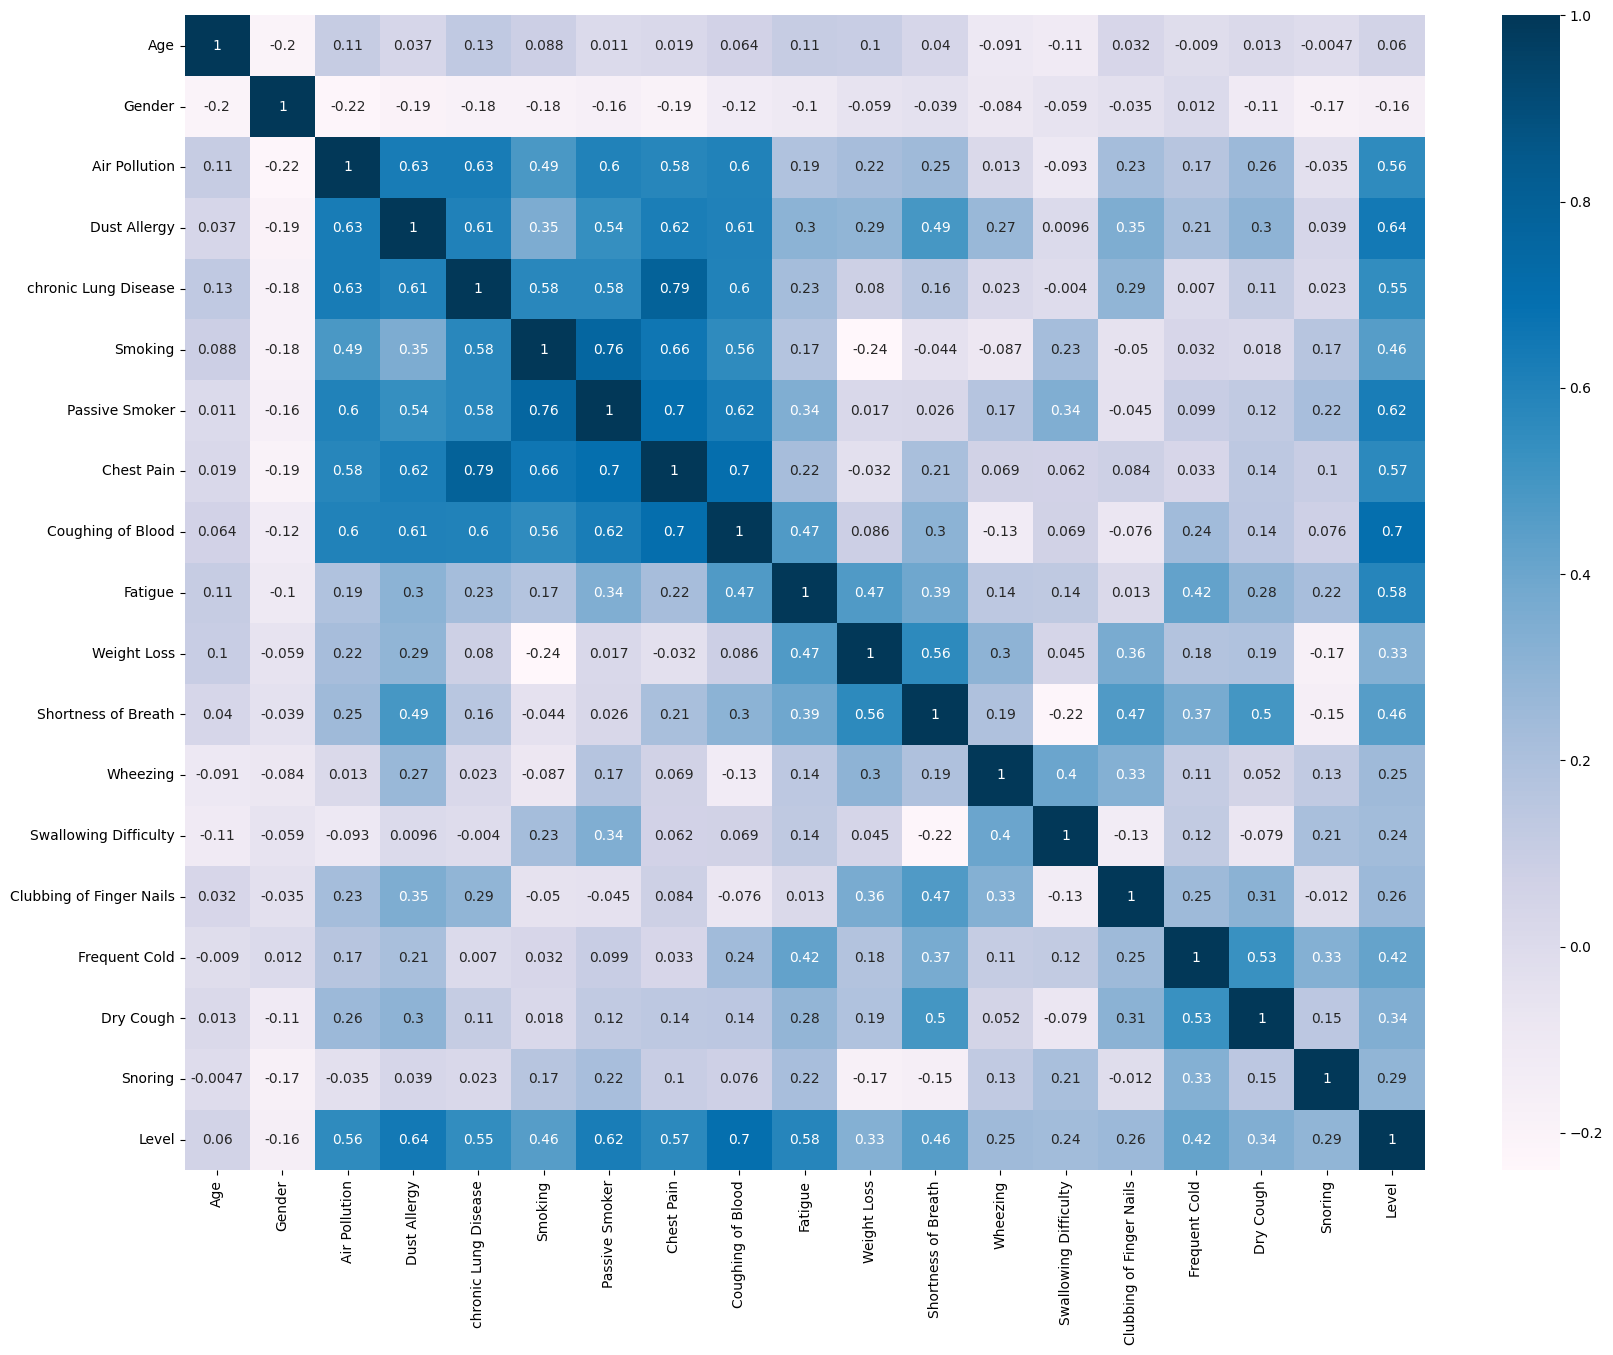

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [77]:
x_L = df_cancer.iloc[:, 0:18]
x_L

Age  Gender  Air Pollution  Dust Allergy  chronic Lung Disease  Smoking  \
0     33       1              6             7                     6        4   
1     17       1              1             2                     6        2   
2     35       1              6             7                     7        8   
3     37       1              4             6                     4        2   
4     46       1              6             7                     6        8   
..   ...     ...            ...           ...                   ...      ...   
995   44       1              4             6                     4        2   
996   37       2              2             5                     2        3   
997   25       2              3             4                     3        1   
998   18       2              4             6                     5        6   
999   47       1              2             4                     3        2   

     Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  Weight Loss  \
0                 8           7                  7        4            4   
1                 1           3                  4        4            2   
2                 7           9                  6        5            2   
3                 3           4                  8        8            7   
4                 7           7                  9        3            2   
..              ...         ...                ...      ...          ...   
995               3           4                  8        8            7   
996               2           2                  4        3            4   
997               4           3                  1        3            2   
998               6           6                  5        1            4   
999               3           4                  4        1            2   

     Shortness of Breath  Wheezing  Swallowing Difficulty  \
0                      5         6                      5   
1                      2         2                      3   
2                      5         2                      3   
3                      9         2                      1   
4                      4         1                      4   
..                   ...       ...                    ...   
995                    9         2                      1   
996                    2         2                      3   
997                    2         4                      2   
998                    3         2                      4   
999                    4         6                      5   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  
0                           5              4          6        4  
1                           2              1          2        2  
2                           2              1          7        2  
3                           4              6          7        5  
4                           2              4          2        3  
..                        ...            ...        ...      ...  
995                         4              6          7        3  
996                         1              2          3        4  
997                         2              3          4        2  
998                         6              2          4        3  
999                         4              2          1        2  

[1000 rows x 18 columns]

In [78]:
x_L = x_L.values
x_L

array([[33,  1,  6, ...,  4,  6,  4],
       [17,  1,  1, ...,  1,  2,  2],
       [35,  1,  6, ...,  1,  7,  2],
       ...,
       [25,  2,  3, ...,  3,  4,  2],
       [18,  2,  4, ...,  2,  4,  3],
       [47,  1,  2, ...,  2,  1,  2]], dtype=int64)

In [79]:
df_cancer['Level'].unique()

array([0, 1, 2], dtype=int64)

In [80]:
df_cancer['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

In [81]:
y_L = df_cancer.Level.values
y_L

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
x_L_train, x_L_test, y_L_train, y_L_test = train_test_split(x_L, y_L, test_size=0.3, random_state=2)

In [83]:
y_L_test.shape

(300,)

In [84]:
model_LR = LogisticRegression()
model_LR.fit(x_L_train, y_L_train)

LogisticRegression()

In [85]:
y_pred_LR_train=model_LR.predict(x_L_train)

In [86]:
y_pred_LR = model_LR.predict(x_L_test)

In [87]:
data=pd.DataFrame({'y_L_Test  ':y_L_test,'y_pred_LR  ':y_pred_LR})
data[:20]

y_L_Test    y_pred_LR  
0            0            2
1            0            0
2            1            1
3            1            1
4            0            0
5            2            2
6            1            1
7            1            1
8            2            2
9            0            0
10           1            1
11           1            1
12           1            1
13           2            2
14           1            1
15           1            1
16           1            1
17           2            2
18           0            0
19           1            1

In [88]:
pd.Series(y_pred_LR).value_counts()

2    116
1    104
0     80
dtype: int64

##### Function of Measure Performance

In [89]:
from sklearn import metrics

In [90]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')

    plt.ylabel('True label')
    plt.title('Confusion Matrix for Logistic Regression Model')
    plt.show()

##### Confusion Matrix of Logiistic Regression Model Outcome 

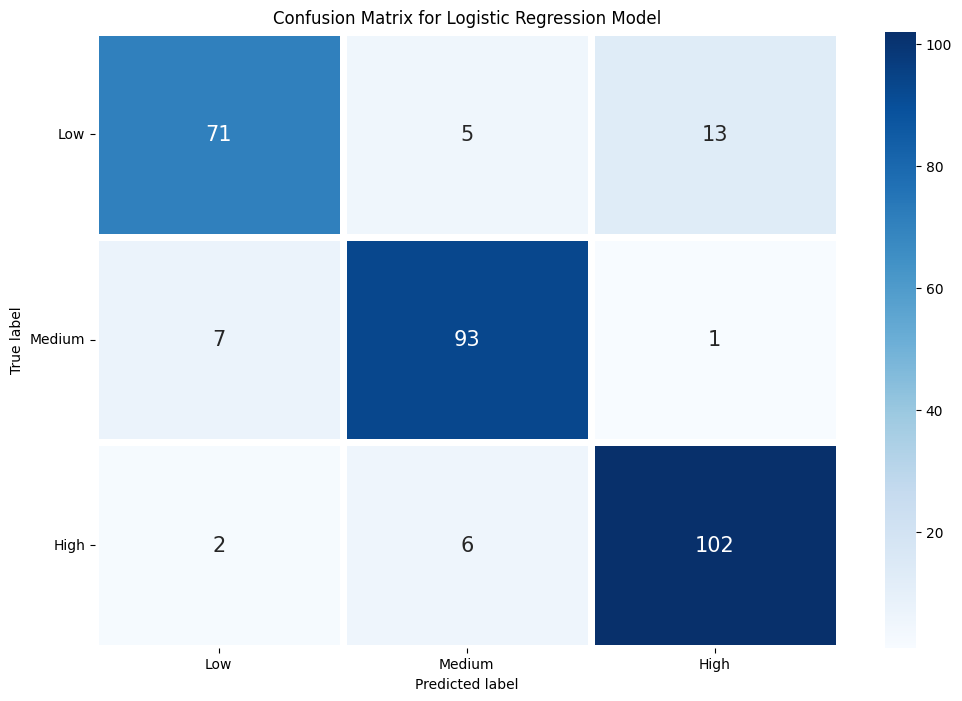

In [91]:
CM(y_L_test, y_pred_LR, col_names=['Low', 'Medium', 'High'])

In [92]:
recall_train =recall_score(y_L_train, y_pred_LR_train, average = 'micro')
recall_train

0.9028571428571428

In [93]:
recall= recall_score(y_L_test, y_pred_LR, average = 'micro')
recall

0.8866666666666667

##### Classification Report of Multiclass Logistic Model 

In [94]:
print(classification_report(y_L_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        89
           1       0.89      0.92      0.91       101
           2       0.88      0.93      0.90       110

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300



In [95]:
confusion_matrix = metrics.confusion_matrix(y_L_test,y_pred_LR )

confusion_matrix

array([[ 71,   5,  13],
       [  7,  93,   1],
       [  2,   6, 102]], dtype=int64)

In [96]:
Accuracy = metrics.accuracy_score(y_L_test, y_pred_LR)
Accuracy

0.8866666666666667

In [97]:
F1_score = metrics.f1_score(y_L_test, y_pred_LR,average='weighted')
F1_score

0.8857070829241045

### $SVM$

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [99]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train[:1000],y_train[:1000])
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
Best C 0.14
Best Gamma 0.04


In [100]:
rbf = SVC(kernel='rbf',C=best_C,gamma=best_gamma)
rbf.fit(x_train, y_train)

SVC(C=0.14, gamma=0.04)

In [101]:
y_pred_RBF_train=rbf.predict(x_train)
#print(classification_report(y_train, y_pred_RBF_train))

In [102]:
y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.96      0.96      0.96        96
           2       0.92      0.94      0.93       115

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [103]:
recalltrain= recall_score(y_train, y_pred_RBF_train, average = 'micro')
recalltrain

0.96

In [104]:
recall= recall_score(y_test, y_pred_RBF, average = 'micro')
recall

0.9466666666666667

### $Comparing$  $ROC-AUC$ $Curve$

#### $1.$ $Decision Tree$

ROC AUC score for Decision Tree: 0.9469000506346793


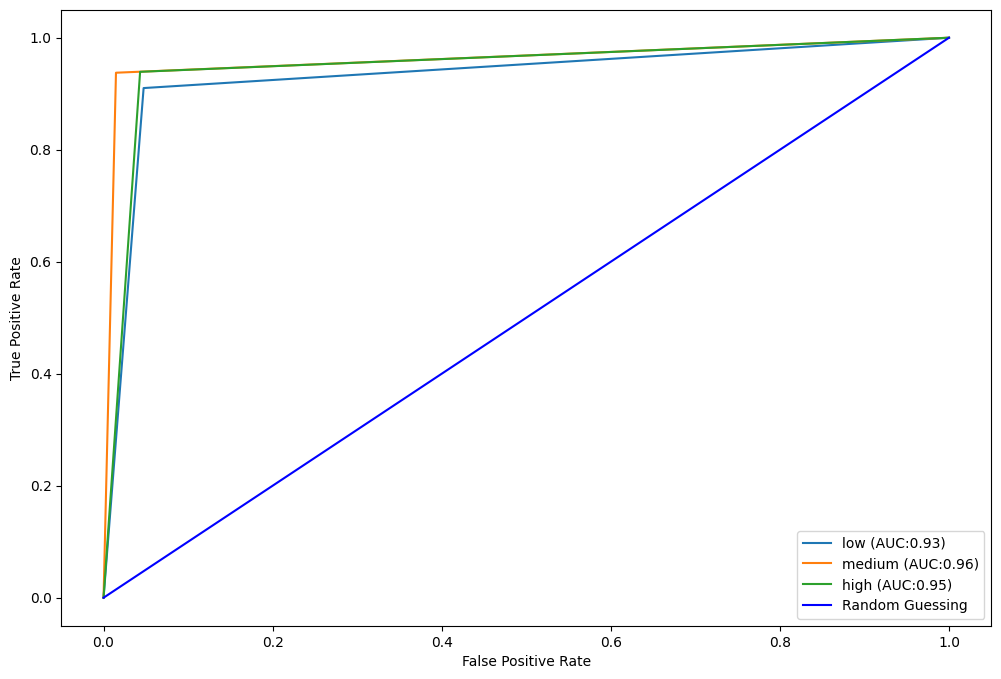

In [105]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['low', 'medium', 'high']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred_DT, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred_DT = lb.transform(y_pred_DT)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred_DT[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred_DT, average=average)

DecisionTree_ROC_AUC=multiclass_roc_auc_score(y_test, y_pred_DT)
print('ROC AUC score for Decision Tree:', DecisionTree_ROC_AUC)

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

#### $2.$ $Random Forest$

ROC AUC score for Random forest: 0.9647048627667942


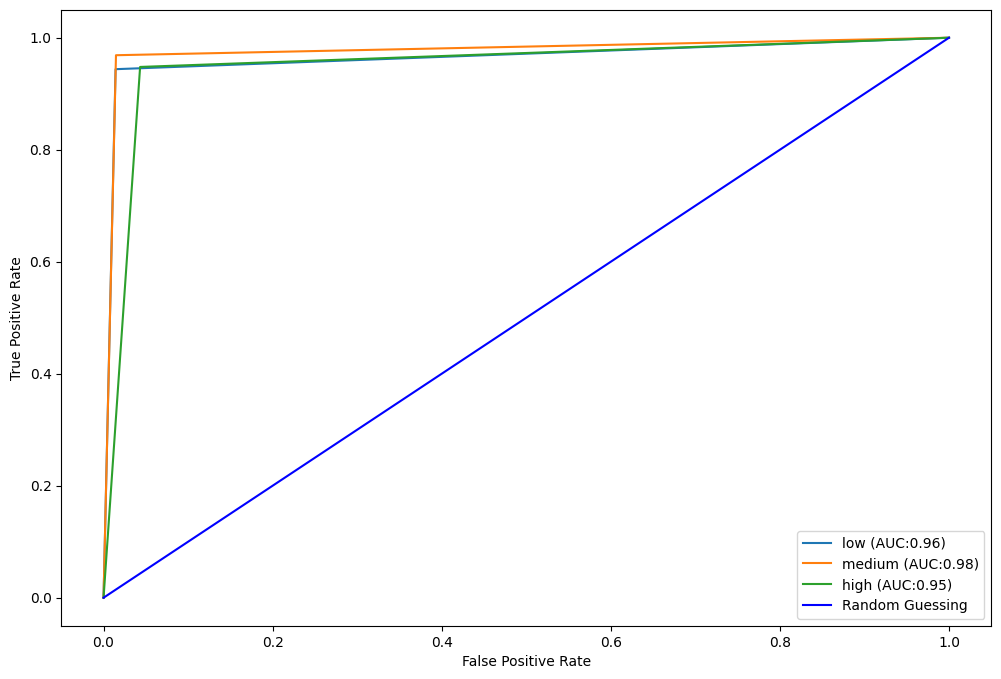

In [106]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['low', 'medium', 'high']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred_rf, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred_rf = lb.transform(y_pred_rf)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred_rf[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred_rf, average=average)

RandomForest_ROC_AUC=multiclass_roc_auc_score(y_test, y_pred_rf)
print('ROC AUC score for Random forest:', RandomForest_ROC_AUC)

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

#### $3.$ $KNN$

ROC AUC score for K-Nearest Neighbourhood: 0.9570592886602586


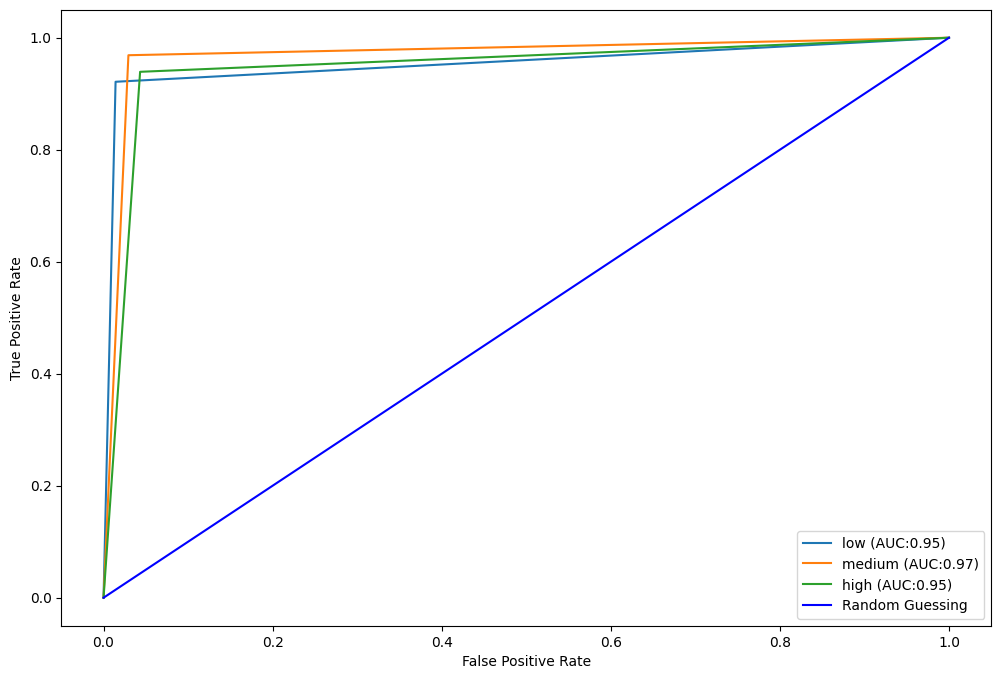

In [107]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['low', 'medium', 'high']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred_KNN, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred_KNN = lb.transform(y_pred_KNN)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred_KNN[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred_KNN, average=average)

KNN_ROC_AUC=multiclass_roc_auc_score(y_test, y_pred_KNN)
print('ROC AUC score for K-Nearest Neighbourhood:', KNN_ROC_AUC)

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

#### $4.$ $Logistic Regression$

ROC AUC score for Logistic Regression: 0.912367165766255


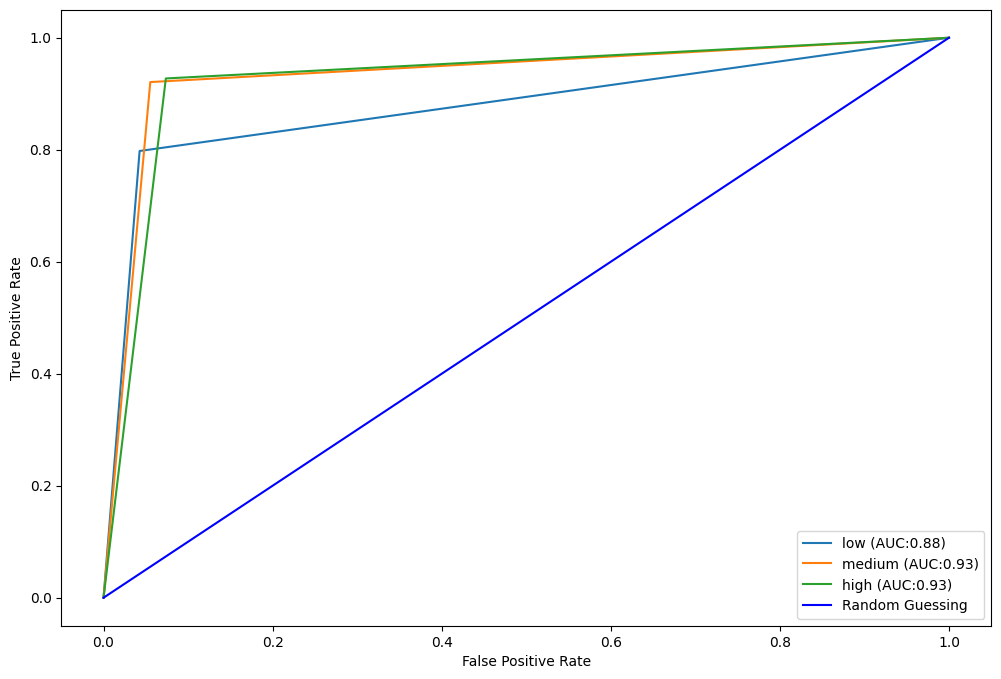

In [108]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['low', 'medium', 'high']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_L_test, y_pred_LR, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_L_test = lb.transform(y_L_test)
    y_pred_LR = lb.transform(y_pred_LR)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_L_test[:,idx].astype(int), y_pred_LR[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_L_test, y_pred_LR, average=average)

Logistic_ROC_AUC=multiclass_roc_auc_score(y_L_test, y_pred_LR)
print('ROC AUC score for Logistic Regression:', Logistic_ROC_AUC)

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

#### $5.$ $SVM$

ROC AUC score for SVM: 0.959801581928411


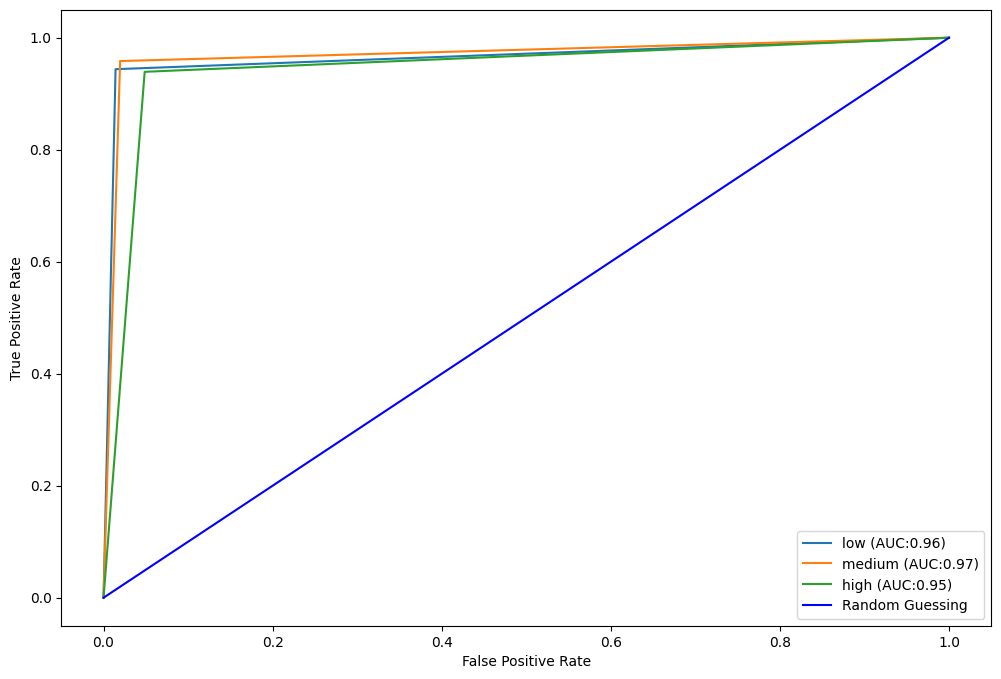

In [109]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['low', 'medium', 'high']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred_RBF, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred_RBF = lb.transform(y_pred_RBF)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred_RBF[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred_RBF, average=average)

SVM_ROC_AUC=multiclass_roc_auc_score(y_test, y_pred_RBF)
print('ROC AUC score for SVM:', SVM_ROC_AUC)

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [110]:
ROC_AUC_Scores = [('Decision Tree',DecisionTree_ROC_AUC),
          ('Random Forest',RandomForest_ROC_AUC),
                 ('K Nearest Neighbourhood',KNN_ROC_AUC),
                  ('Logistic Regression',Logistic_ROC_AUC),
                 ('Support Vector Machine',SVM_ROC_AUC)]

In [111]:
Comparison = pd.DataFrame(data = ROC_AUC_Scores, columns=['Model', 'ROC_AUC_Score'])

In [112]:
Comparison

Model  ROC_AUC_Score
0            Decision Tree       0.946900
1            Random Forest       0.964705
2  K Nearest Neighbourhood       0.957059
3      Logistic Regression       0.912367
4   Support Vector Machine       0.959802

- We can see that Random Forest model have the highest ROC_AUC Score of 0.9647 among all the models

## $Conclusion$

- Compared Model Performance using Confusion Matrix and Classification Report and concluded that Random Forest is the best model t predict the level of lung cancer, with ROC AUC scores of $0.96$ and having $training$ and $testing$ recall of $0.99$ and $0.94$ respectively.